In [1]:
import cv2
import os
import pydicom
from PIL import Image

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pydicom
from PIL import Image

# Define folder paths
#dicom_folder_path = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/Imagens_IPO_23_FEV/CT Copy"
png_folder_path = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/AA_UPSCALE/CT_UPSCALE_1024_zoom"
#png_folder_path = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/CT PNG JULHO ZOOM_256"
#png_folder_path = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/CT PNG"


slices_15_plus_points = []
num_slices_15_plus_points = 0
slices_centers_ct = {}

# Loop over all files in the PNG folder
count_loop = 0
for file_name in os.listdir(png_folder_path):
    count_loop+=1
    if count_loop%5 == 0:
        print('count: ',count_loop, '  total: 210')
    if file_name.endswith(".png"):
        #slice_number = int(file_name[:-4])  # Extract the slice number from the file name
        slice_number = int(file_name.split(".")[0])
        #print(slice_number)
        image_path = os.path.join(png_folder_path, file_name)
        img = cv2.imread(image_path, 0)

        ret, thresh = cv2.threshold(img, 210, 255, cv2.THRESH_BINARY)

        # Finding the contours in the image
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

        # Get the center of the image
        image_height, image_width = img.shape[:2]
        center_x = image_width // 2
        center_y = image_height // 2

        # Define the minimum contour area and maximum distance from center
        min_contour_area = 100 #35  # adjust as needed; 10
        max_contour_area = 340 #120  # adjust as needed; 70
        max_distance_from_center = 450 #225  # adjust as needed
        circularity_threshold = 0.75  # adjust as needed; 0.8

        # Filter contours based on size and distance from center
        filtered_contours = []

        intensity_array = []
        filtered_centers = []
        for contour in contours:
            mask = np.zeros(img.shape, dtype=np.uint8)
            cv2.drawContours(mask, [contour], 0, 255, -1)
            mean_intensity = cv2.mean(img, mask=mask)[0]
            intensity_array.append(mean_intensity)

        intensity_threshold = np.mean(intensity_array) - (np.mean(intensity_array) * 0.1)

        for contour in contours:
            contour_area = cv2.contourArea(contour)
            perimeter = cv2.arcLength(contour, True) 
            circularity = 4 * np.pi * (contour_area / (perimeter ** 2 - 0.01))

            if contour_area >= min_contour_area and contour_area <= max_contour_area:
                M = cv2.moments(contour)
                centroid_x = int(M["m10"] / M["m00"])
                centroid_y = int(M["m01"] / M["m00"])
                distance_from_center = np.sqrt((centroid_x - center_x) ** 2 + (centroid_y - center_y) ** 2)

                if distance_from_center <= max_distance_from_center:
                    if circularity >= circularity_threshold:
                        mask = np.zeros(img.shape, dtype=np.uint8)
                        cv2.drawContours(mask, [contour], 0, 255, -1)
                        mean_intensity = cv2.mean(img, mask=mask)[0]
                        if mean_intensity > intensity_threshold:
                            filtered_contours.append(contour)
                            filtered_centers.append((centroid_x, centroid_y))
        slices_centers_ct[slice_number] = filtered_centers
        image_with_filtered_contours = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        cv2.drawContours(image_with_filtered_contours, filtered_contours, -1, (0, 255, 0), 5)

        if len(filtered_contours) > 14:
            slices_15_plus_points.append(slice_number)
            num_slices_15_plus_points += 1
            if num_slices_15_plus_points % 1 == 0:
                plt.figure(figsize=(9, 9))
                imgplot = plt.imshow(image_with_filtered_contours)
                plt.title("Slice Number: {} | Number of Filtered Contours: {}".format(slice_number, len(filtered_contours)))
plt.show()

print("There are {} slices with 15 or more detected inserts | Slice numbers: {}".format(num_slices_15_plus_points, slices_15_plus_points))


count:  5   total: 210
count:  10   total: 210
count:  15   total: 210
count:  20   total: 210
count:  25   total: 210
count:  30   total: 210
count:  35   total: 210
count:  40   total: 210
count:  45   total: 210
count:  50   total: 210
count:  55   total: 210
count:  60   total: 210
count:  65   total: 210
count:  70   total: 210
count:  75   total: 210
count:  80   total: 210
count:  85   total: 210
count:  90   total: 210
count:  95   total: 210
count:  100   total: 210
count:  105   total: 210
count:  110   total: 210
count:  115   total: 210
count:  120   total: 210
count:  125   total: 210
count:  130   total: 210
count:  135   total: 210
count:  140   total: 210
count:  145   total: 210
count:  150   total: 210
count:  155   total: 210
count:  160   total: 210
count:  165   total: 210
count:  170   total: 210
count:  175   total: 210
count:  180   total: 210
count:  185   total: 210
count:  190   total: 210
count:  195   total: 210
count:  200   total: 210
count:  205   total:

<Figure size 900x900 with 1 Axes>

<Figure size 900x900 with 1 Axes>

<Figure size 900x900 with 1 Axes>

<Figure size 900x900 with 1 Axes>

<Figure size 900x900 with 1 Axes>

<Figure size 900x900 with 1 Axes>

<Figure size 900x900 with 1 Axes>

<Figure size 900x900 with 1 Axes>

<Figure size 900x900 with 1 Axes>

<Figure size 900x900 with 1 Axes>

<Figure size 900x900 with 1 Axes>

<Figure size 900x900 with 1 Axes>

<Figure size 900x900 with 1 Axes>

There are 13 slices with 15 or more detected inserts | Slice numbers: [165, 30, 31, 32, 33, 34, 57, 73, 86, 87, 88, 89, 90]


count:  5   total:  214


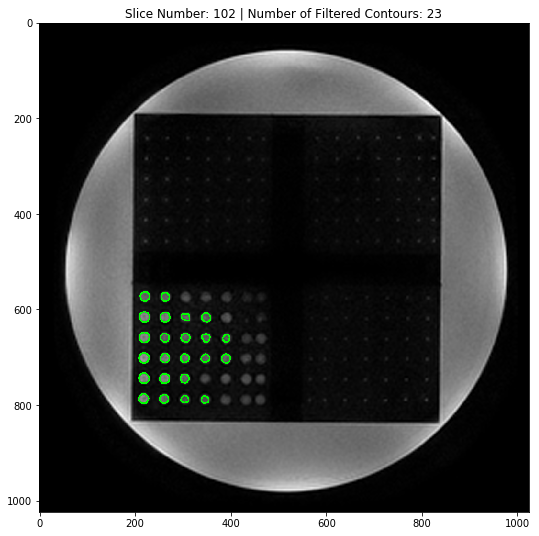

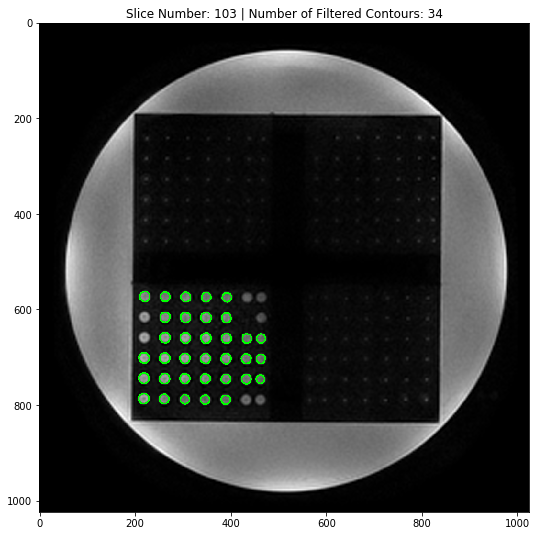

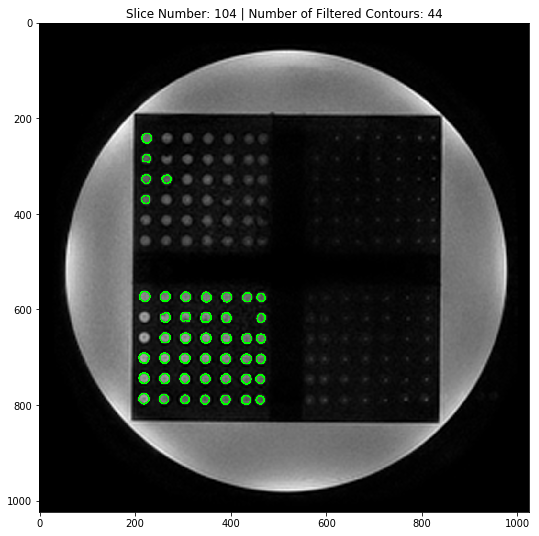

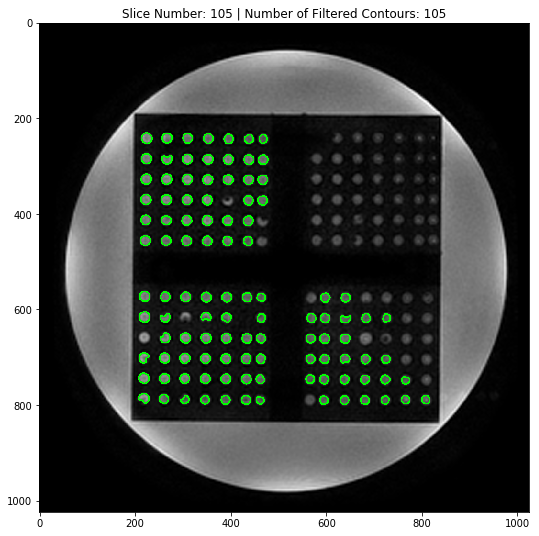

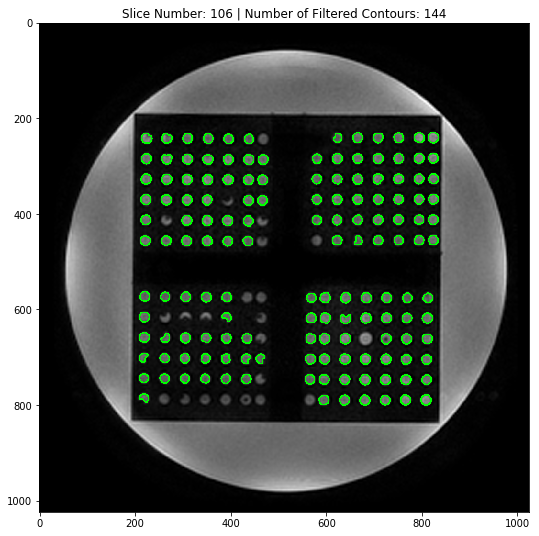

count:  10   total:  214


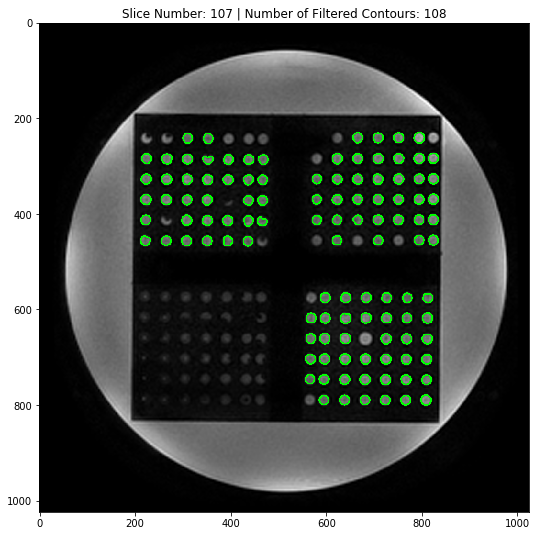

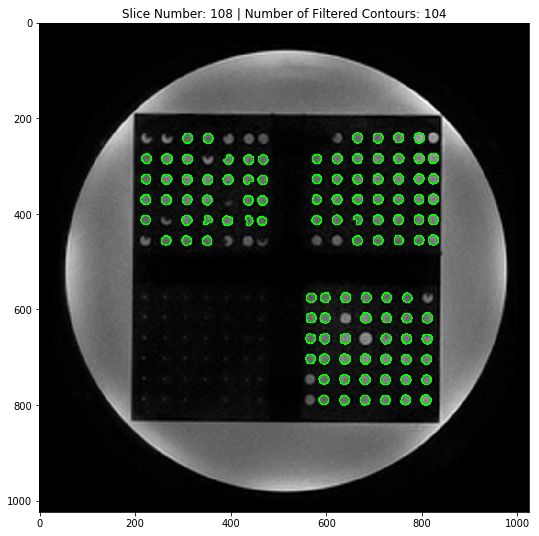

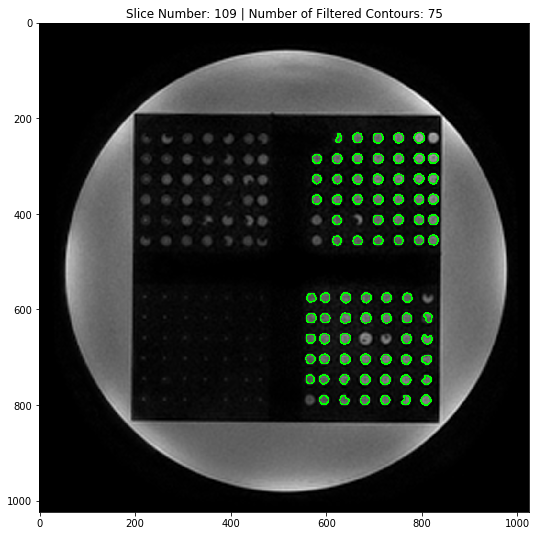

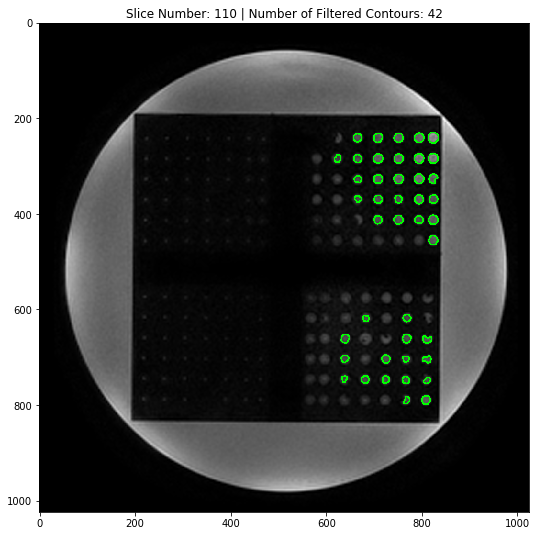

count:  15   total:  214
count:  20   total:  214
count:  25   total:  214
count:  30   total:  214
count:  35   total:  214
count:  40   total:  214
count:  45   total:  214
count:  50   total:  214
count:  55   total:  214
count:  60   total:  214
count:  65   total:  214
count:  70   total:  214
count:  75   total:  214
count:  80   total:  214


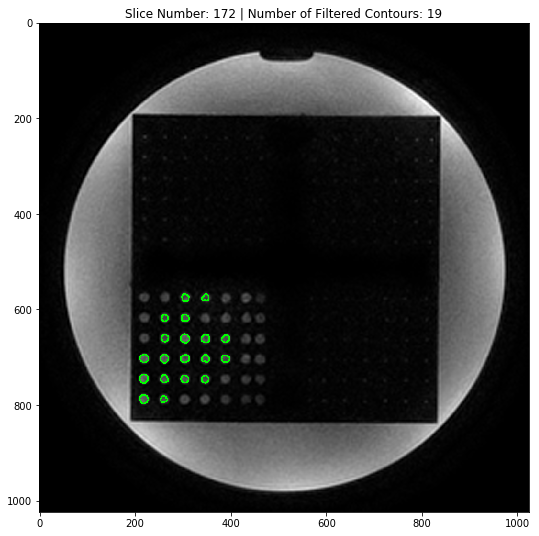

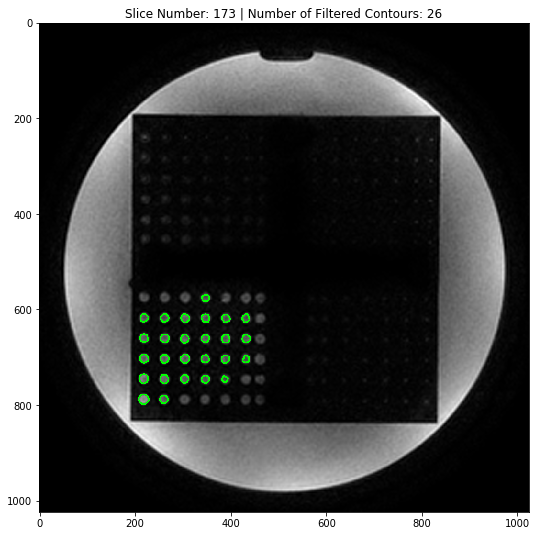

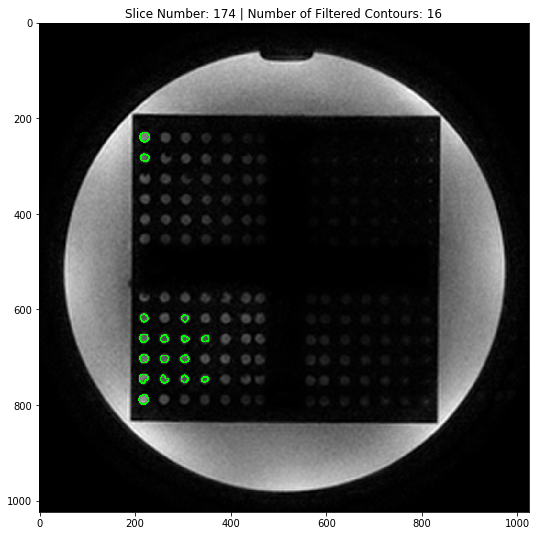

count:  85   total:  214


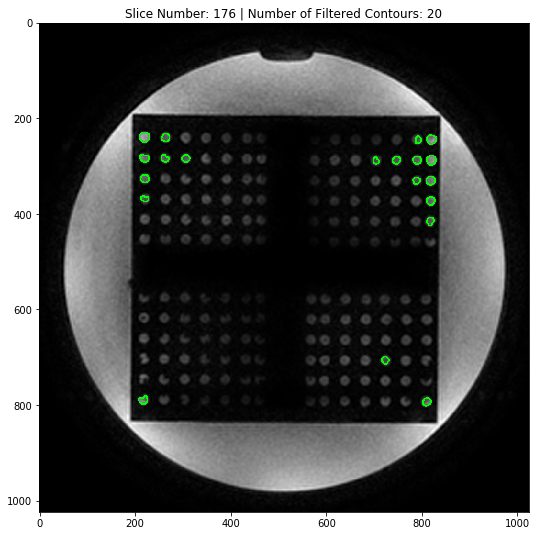

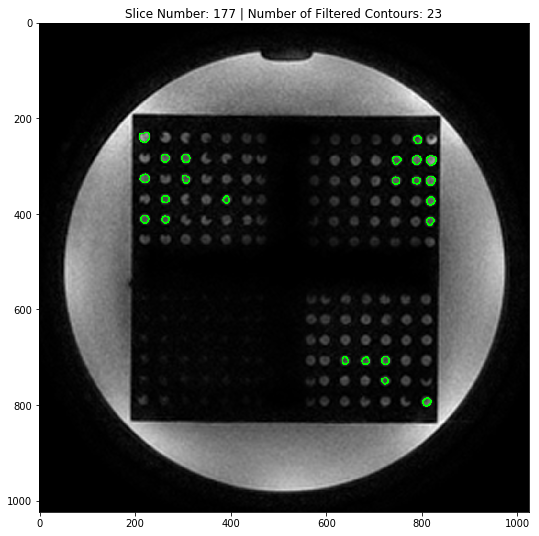

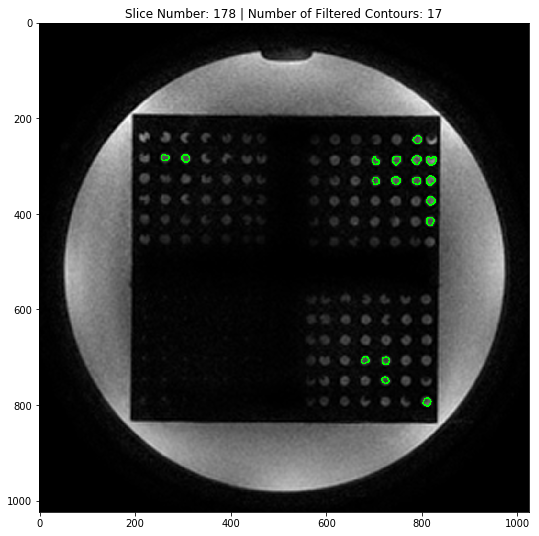

count:  90   total:  214
count:  95   total:  214
count:  100   total:  214
count:  105   total:  214
count:  110   total:  214
count:  115   total:  214
count:  120   total:  214


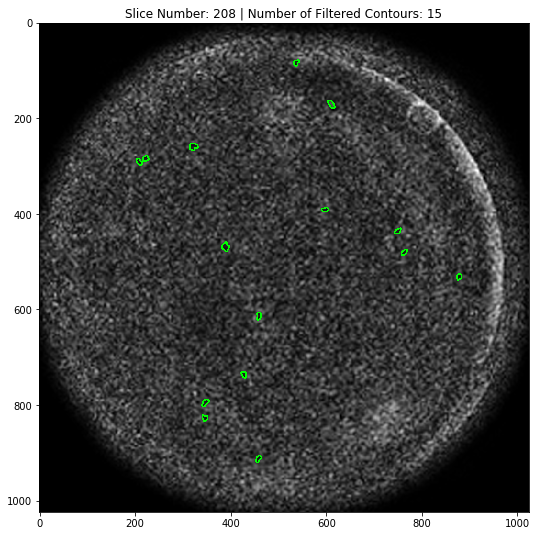

count:  125   total:  214
count:  130   total:  214
count:  135   total:  214


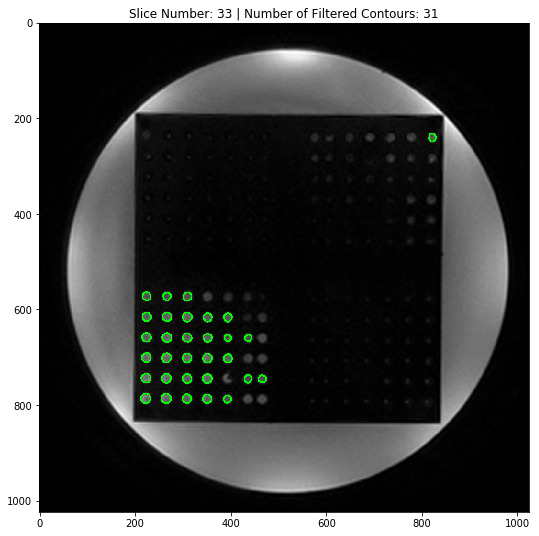

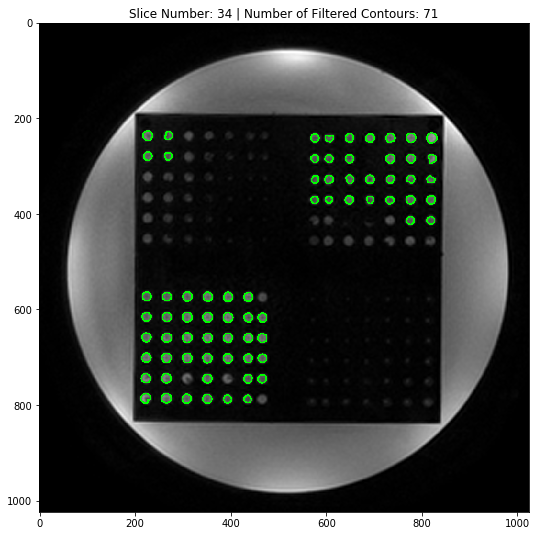

count:  140   total:  214


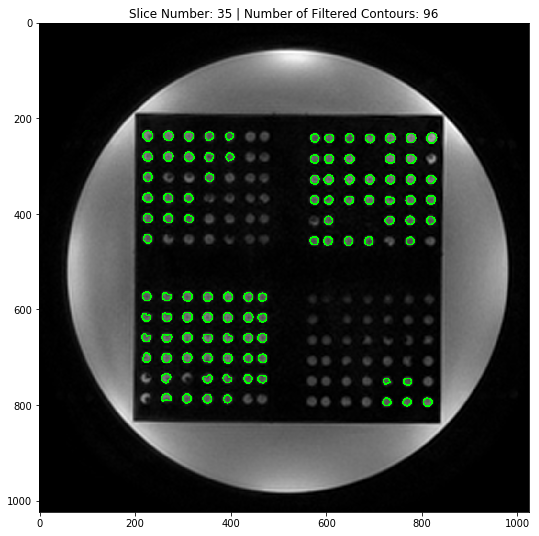

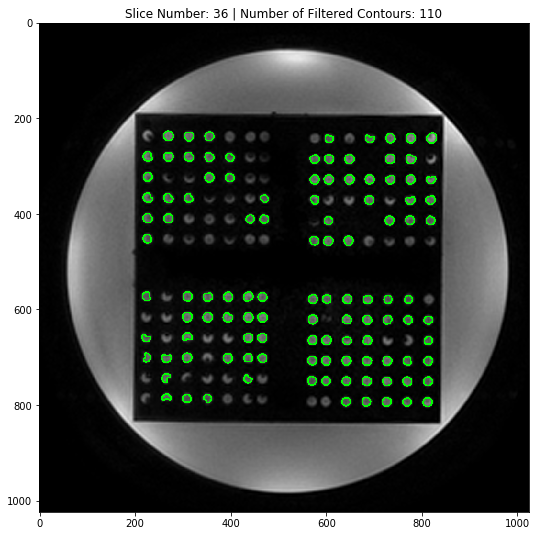

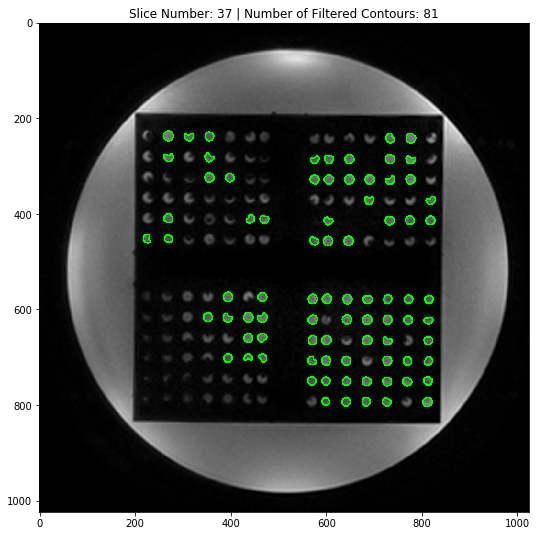

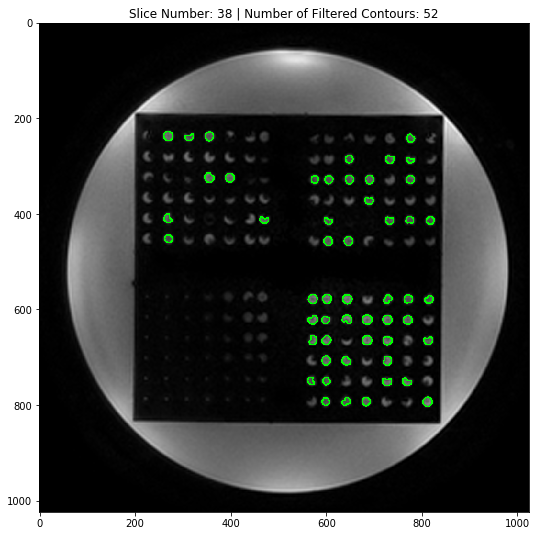

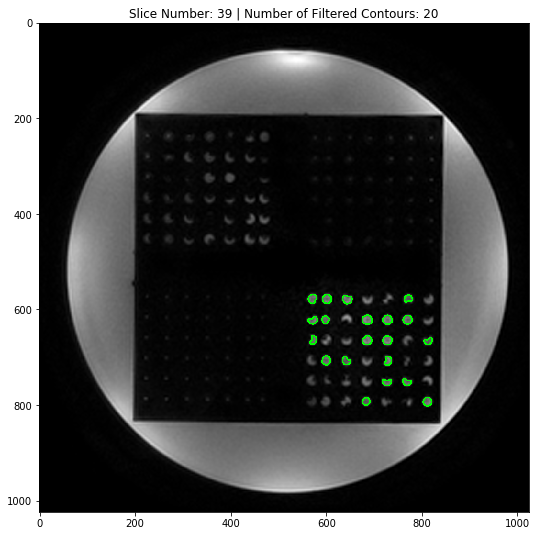

count:  145   total:  214
count:  150   total:  214
count:  155   total:  214
count:  160   total:  214
count:  165   total:  214
count:  170   total:  214
count:  175   total:  214
count:  180   total:  214
count:  185   total:  214
count:  190   total:  214
count:  195   total:  214
count:  200   total:  214
count:  205   total:  214
count:  210   total:  214
There are 23 slices with 15 or more detected inserts | Slice numbers: [102, 103, 104, 105, 106, 107, 108, 109, 110, 172, 173, 174, 176, 177, 178, 208, 33, 34, 35, 36, 37, 38, 39]


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pydicom
from PIL import Image

# Define folder paths
#dicom_folder_path = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/FSPGR 3D OPTIMIZED"
#png_folder_path = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/FSPGR 3D OPTIMIZED PNG"

#dicom_folder_path = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/TEST 6"
dicom_folder_path = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/TEST 2"
png_folder_path = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/AA_UPSCALE/Test 2"
#png_folder_path =  "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/AA_UPSCALE/Test 6"

slices_15_plus_points_mri = []
num_slices_15_plus_points_mri = 0
slices_centers_mri = {}

count_loop=0
# Loop over all files in the PNG folder
for file_name in os.listdir(png_folder_path):
    count_loop+=1
    if count_loop%5 == 0:
        print('count: ',count_loop, '  total: ', 214)
    if file_name.endswith(".png"):
        #slice_number = int(file_name[:-4]) # Extract the slice number from the file name
        slice_number = int(file_name.split(".")[0])
        #print('Slice number: ', slice_number)
        image_path = os.path.join(png_folder_path, file_name)
        img = cv2.imread(image_path, 0)
        
        blur = cv2.GaussianBlur(img, (5, 5), 0)
        # Apply Otsu's thresholding method
        ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        #Thresh
        #ret, thresh = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)

        #Finding the contours in the image
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        # Get the center of the image
        image_height, image_width = img.shape[:2]
        center_x = image_width // 2
        center_y = image_height // 2
        
        min_contour_area = 90 #35 # IMAGEM 256X256, PRECISA DE SER MENOR
        max_contour_area = 370 #120  # adjust as needed #OG: 70
        max_distance_from_center = 450 #225  # adjust as needed; para a mesa não aparecer #OG: 500
        #intensity_threshold = 160  # adjust as needed; para filtrar os que têm ar

        # Define the circularity threshold
        circularity_threshold = 0.70  # adjust as needed #OG: 0.7

        # Filter contours based on size and distance from center
        filtered_contours = []
        filtered_centers = []

        intensity_array = []
        #print('len contours: ',len(contours), '\n')
        for contour in contours:
            mask = np.zeros(img.shape, dtype=np.uint8)
            cv2.drawContours(mask, [contour], 0, 255, -1)
            mean_intensity = cv2.mean(img, mask=mask)[0]
            intensity_array.append(mean_intensity)

        intensity_threshold = np.mean(intensity_array) - (np.mean(intensity_array) * 0.1)

        for contour in contours:
            # Calculate the contour area
            contour_area = cv2.contourArea(contour)
            #print('Contour area:', contour_area)
            perimeter = cv2.arcLength(contour, True)
            circularity = 4 * np.pi * (contour_area / (perimeter ** 2 - 0.01))
            #print('Circularity:', circularity)

            if contour_area >= min_contour_area and contour_area <= max_contour_area:
                M = cv2.moments(contour)
                centroid_x = int(M["m10"] / M["m00"])
                centroid_y = int(M["m01"] / M["m00"])
                distance_from_center = np.sqrt((centroid_x - center_x) ** 2 + (centroid_y - center_y) ** 2)

                if distance_from_center <= max_distance_from_center:
                    if circularity >= circularity_threshold:
                        mask = np.zeros(img.shape, dtype=np.uint8)
                        cv2.drawContours(mask, [contour], 0, 255, -1)
                        mean_intensity = cv2.mean(img, mask=mask)[0]
                        if mean_intensity > intensity_threshold:
                            filtered_contours.append(contour)
                            filtered_centers.append((centroid_x, centroid_y))

        slices_centers_mri[slice_number] = filtered_centers
        image_with_filtered_contours = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        cv2.drawContours(image_with_filtered_contours, filtered_contours, -1, (0, 255, 0), 2)

        if len(filtered_contours) > 14:
            slices_15_plus_points_mri.append(slice_number)
            num_slices_15_plus_points_mri += 1
            if num_slices_15_plus_points_mri % 1 == 0:
                plt.figure(figsize=(9, 9))
                imgplot = plt.imshow(image_with_filtered_contours)
                plt.title("Slice Number: {} | Number of Filtered Contours: {}".format(slice_number, len(filtered_contours)))
                plt.show()

print("There are {} slices with 15 or more detected inserts | Slice numbers: {}".format(num_slices_15_plus_points_mri, slices_15_plus_points_mri))

In [4]:
import math

def euclidean_distance_3d(point1, point2):
    x1, y1, z1 = point1
    x2, y2, z2 = point2
    distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2 + (z2 - z1) ** 2)
    return distance

point1 = (2, 3, 5)
point2 = (4, 1, 7)
distance = euclidean_distance_3d(point1, point2)
print(distance)


3.4641016151377544


Agora guardando cada insert, slice, distorção e distância ao isocentro

1º, preciso das coordenadas z de cada slice para calcular distância ao isocentro

In [5]:
# Define folder paths

#dicom_folder_path = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/TEST 6"
dicom_folder_path = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/TEST 2"

#dicom_folder_path = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/TEST 2"
#png_folder_path = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/FSPGR 3D OPTIMIZED PNG"

# Initialize the dictionary to store z-coordinates
z_coordinates = {}
# Convert DICOM images to PNG
i = 0
for file_name in os.listdir(dicom_folder_path):
    i += 1
    if file_name.endswith(".dcm"):
        dicom_path = os.path.join(dicom_folder_path, file_name)
        ds = pydicom.dcmread(dicom_path)
        slice_number = ds.InstanceNumber
        
        # Extract the z-coordinate from the DICOM metadata
        z_coordinate = ds.ImagePositionPatient[2]  # Assuming the z-coordinate is the third element in the ImagePositionPatient tag
        # Store the z-coordinate for the slice
        z_coordinates[slice_number] = z_coordinate
        
print(z_coordinates)

# Calculate the mean of the z-coordinates
z_mean = np.mean(list(z_coordinates.values()))

# Print the mean z-coordinate
print("Mean Z-coordinate:", z_mean)

{'128': '-32.9023', '111': '-15.9023', '108': '-12.9023', '210': '-114.902', '27': '68.0977', '147': '-51.9023', '4': '91.0977', '80': '15.0977', '90': '5.09775', '76': '19.0977', '192': '-96.9023', '73': '22.0977', '2': '93.0977', '106': '-10.9023', '181': '-85.9023', '164': '-68.9023', '162': '-66.9023', '1': '94.0977', '104': '-8.90225', '172': '-76.9023', '64': '31.0977', '135': '-39.9023', '163': '-67.9023', '29': '66.0977', '140': '-44.9023', '33': '62.0977', '114': '-18.9023', '134': '-38.9023', '152': '-56.9023', '116': '-20.9023', '127': '-31.9023', '65': '30.0977', '139': '-43.9023', '120': '-24.9023', '66': '29.0977', '12': '83.0977', '117': '-21.9023', '28': '67.0977', '84': '11.0977', '187': '-91.9023', '146': '-50.9023', '165': '-69.9023', '45': '50.0977', '6': '89.0977', '148': '-52.9023', '56': '39.0977', '107': '-11.9023', '169': '-73.9023', '123': '-27.9023', '102': '-6.90225', '67': '28.0977', '194': '-98.9023', '78': '17.0977', '177': '-81.9023', '36': '59.0977', '3

In [6]:
import pydicom
import os


####ECLIPSE ISOCENTER#####
isocenter_eclipse_x = 120
isocenter_eclipse_y = 136
isocenter_eclipse_z = 94

#####


# Specify the path to the folder containing DICOM files for MRI and CT
#folder_path_mri = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/TEST 6"
folder_path_mri = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/TEST 2"
folder_path_ct = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/CT"
#folder_path_ct = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/Imagens_IPO_23_FEV/CT Copy"

# Get a list of all DICOM files in the MRI folder
dicom_files_mri = [os.path.join(folder_path_mri, filename) for filename in os.listdir(folder_path_mri)]

# Get a list of all DICOM files in the CT folder
dicom_files_ct = [os.path.join(folder_path_ct, filename) for filename in os.listdir(folder_path_ct)]

# Read the first DICOM file from MRI to retrieve common attributes
first_dcm_mri = pydicom.dcmread(dicom_files_mri[0])

# Read the first DICOM file from CT to retrieve common attributes
first_dcm_ct = pydicom.dcmread(dicom_files_ct[0])

# Retrieve the slice thickness from the common attributes for MRI
mri_slice_thickness = first_dcm_mri.SliceThickness

# Retrieve the slice thickness from the common attributes for CT
ct_slice_thickness = first_dcm_ct.SliceThickness

mri_pixel_spacing = first_dcm_mri.PixelSpacing
ct_pixel_spacing = first_dcm_ct.PixelSpacing

# Print the pixel spacing
print("MRI Pixel Spacing:", mri_pixel_spacing[0], "mm/pixel (X dimension)", mri_pixel_spacing[1], "mm/pixel (Y dimension)")
print("CT Pixel Spacing:", ct_pixel_spacing[0], "mm/pixel (X dimension)", ct_pixel_spacing[1], "mm/pixel (Y dimension)")

# Retrieve the image dimensions for MRI
mri_rows = first_dcm_mri.Rows
mri_columns = first_dcm_mri.Columns

# Retrieve the image dimensions for CT
ct_rows = first_dcm_ct.Rows
ct_columns = first_dcm_ct.Columns

# Calculate the dimension quotient of MRI to CT
resolution_quotient2 = (ct_rows) / (mri_rows)

# Print the slice thickness, resolutions, image dimensions, and the dimension quotient
print("Slice Thickness MRI:", mri_slice_thickness, "mm")
print("Slice Thickness CT:", ct_slice_thickness, "mm")
print("MRI Image Dimensions:", mri_rows, "x", mri_columns)
print("CT Image Dimensions:", ct_rows, "x", ct_columns)
print("Resolution Quotient (size of CT/MRI):", resolution_quotient2)


MRI Pixel Spacing: 0.9375 mm/pixel (X dimension) 0.9375 mm/pixel (Y dimension)
CT Pixel Spacing: 0.585938 mm/pixel (X dimension) 0.585938 mm/pixel (Y dimension)
Slice Thickness MRI: 1 mm
Slice Thickness CT: 1.25 mm
MRI Image Dimensions: 256 x 256
CT Image Dimensions: 512 x 512
Resolution Quotient (size of CT/MRI): 2.0


In [7]:
print(slices_centers_ct[83])

[(521, 459), (520, 416)]


## Registo manual v2

CT, MRI CONVERSION:  0.585938 0.9375

 ################## 
 CT SLICE NUMBER: 85   MRI SLICE NUMBER: 102
LEN CT, MRI: 3 23
LEN CT, MRI: 3 23

 ################## 
 CT SLICE NUMBER: 86   MRI SLICE NUMBER: 103
LEN CT, MRI: 27 34
LEN CT, MRI: 27 34
CENTRO: 112.5 127.5 88.125

 Insert distance isocenter:  [66.70291088335276, 62.5924492032835, 71.8643742145578, 84.7364134574092, 49.29104066108896, 50.38225221137524, 70.88270357439553, 78.4889087009273, 39.988001740561195, 50.35389649846499, 57.1436050802056, 64.47555291603264, 72.72223817912406, 30.782316764509865, 36.970113695262356, 43.31414871050365, 59.41008215217452, 30.337433366737702, 46.471095792337685, 55.3530240853255, 25.833016211091184, 43.647044036509506, 53.15438984840528]


<Figure size 648x648 with 0 Axes>

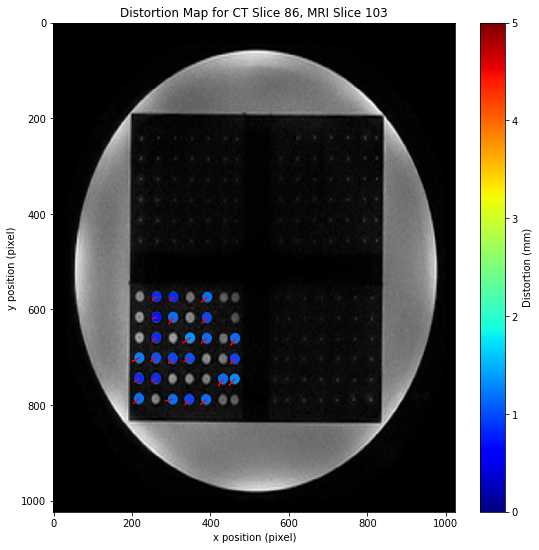


 ################## 
 CT SLICE NUMBER: 86   MRI SLICE NUMBER: 104
LEN CT, MRI: 27 44
LEN CT, MRI: 27 44
CENTRO: 112.5 127.5 88.125

 Insert distance isocenter:  [60.37466234701131, 66.9180717019887, 62.82168970399972, 72.06412617419294, 84.90588769705549, 49.581818133799054, 50.66676758873241, 71.08521411668973, 78.53242046730207, 40.3220494987699, 50.63857119408213, 57.39461300124342, 64.69812148608432, 72.91964019234632, 31.245816126173196, 37.35691778828421, 43.644764617484476, 59.65155372098974, 30.807626706405834, 46.695369358548284, 55.612114466100145, 19.755765821732272, 26.383607156006928, 43.97515722683661, 53.42414398150194]


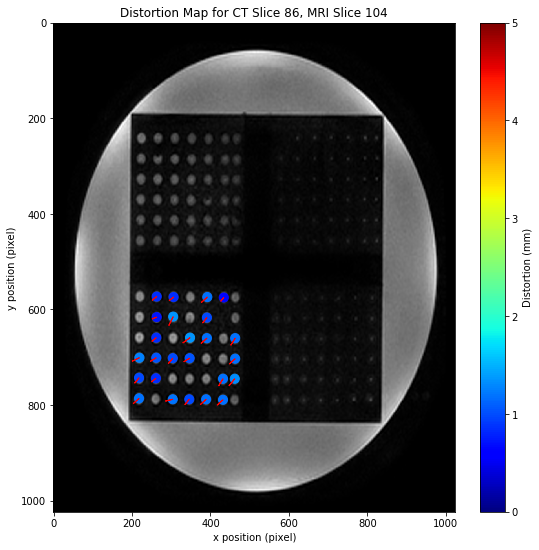


 ################## 
 CT SLICE NUMBER: 87   MRI SLICE NUMBER: 105
LEN CT, MRI: 49 105
LEN CT, MRI: 49 105
CENTRO: 112.5 127.5 88.125

 Insert distance isocenter:  [65.29302378568575, 60.6287873333751, 63.27856089965424, 67.34715949895826, 72.32958487131148, 78.4497640437218, 50.112315259075785, 50.969317612565945, 54.00236223493492, 58.48903351069861, 64.42704207085717, 71.30117576881622, 78.86703233330452, 54.723327549821015, 48.784245283601805, 40.70156846831888, 41.83170569750294, 45.478295819269654, 57.661873032034784, 64.935328780473, 73.20901290355239, 31.73406726832577, 37.89620126493551, 33.354456604637186, 43.99563022068925, 51.58263337991043, 59.70898255418736, 62.04911778243205, 31.276379490959307, 23.809321474214673, 65.35230918954777, 56.03121732082148, 32.50790919386004, 17.856859512260968, 20.437452217069524, 27.139779419758096, 35.27231189372374, 44.3234075080538, 53.71116420406702, 32.917636622048825, 69.65032115021528]


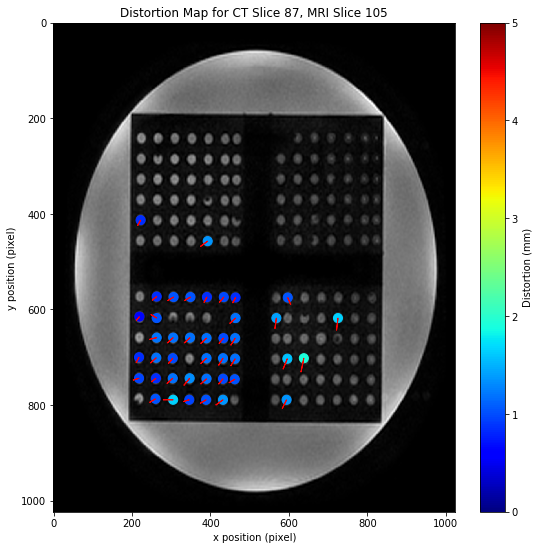


 ################## 
 CT SLICE NUMBER: 88   MRI SLICE NUMBER: 106
LEN CT, MRI: 52 144
LEN CT, MRI: 52 144
CENTRO: 112.5 127.5 88.125

 Insert distance isocenter:  [84.79874065111831, 92.16452308999516, 68.88751339650115, 78.63971071642176, 62.39219217603473, 73.62845021892437, 83.99458513518148, 81.26460956393088, 79.97375057636098, 60.51279282683229, 41.75889045030561, 27.73657561692007, 54.01517527654844, 63.59514164632095, 78.11195203540397, 59.795029531229645, 28.405824563645833, 57.00325725685003, 66.2949895147863, 72.432113960677, 81.38484153477614, 63.898465678102355, 48.32275976522993, 42.15167749942611, 69.88502869948702, 40.35948388487054, 69.3068711082278, 61.87011699482332, 43.82499153237226, 53.45240334941101, 74.6729931648861, 68.930958580171, 58.487246957269456, 54.30676618539926, 53.22841496941507, 61.21810393992941, 73.23459335629919, 80.62023060021133, 89.62354127343231, 65.86437925827681, 87.16733637808373, 80.5312636423155, 72.97611044247631, 75.2230569757787, 82.9

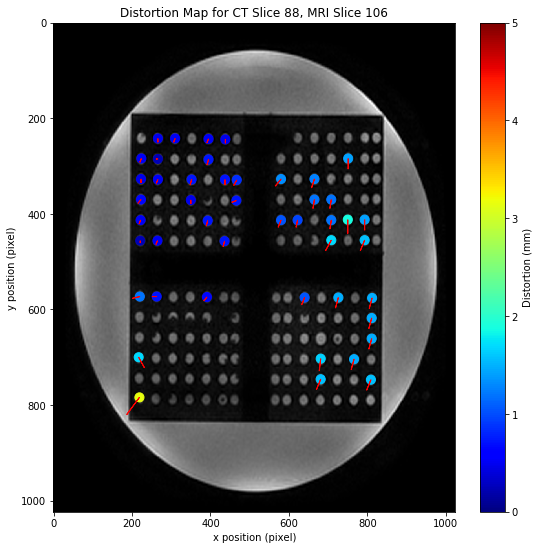


 ################## 
 CT SLICE NUMBER: 89   MRI SLICE NUMBER: 107
LEN CT, MRI: 116 108
LEN CT, MRI: 116 108
CENTRO: 112.5 127.5 88.125

 Insert distance isocenter:  [97.604062305396, 89.88108735035001, 82.82780813700946, 76.24993756401132, 65.90340128385826, 92.35285223752567, 84.12123441841617, 76.18795663573164, 69.13927611678564, 62.70773290133363, 54.18200754315264, 57.33600296783972, 79.05966058389465, 87.79419849319487, 62.67005380986401, 55.650419929064775, 49.4712299007274, 74.80734696643272, 66.09649447611613, 83.98529941351715, 49.4712299007274, 42.70168710989356, 38.39861155225049, 71.94839323475195, 62.590678360105066, 53.49534515380754, 45.01745538191269, 37.04430479274952, 60.7992442033873, 51.34182418025532, 42.213926908071464, 84.95458632870417, 78.33407337028537, 60.08490290115001, 43.15403517578773, 40.787717997616944, 57.30725379819404, 48.87694059846243, 66.55655966744094, 87.97327502793462, 72.5721304036758, 48.68099332725376, 64.16980532941973, 42.56188337016614,

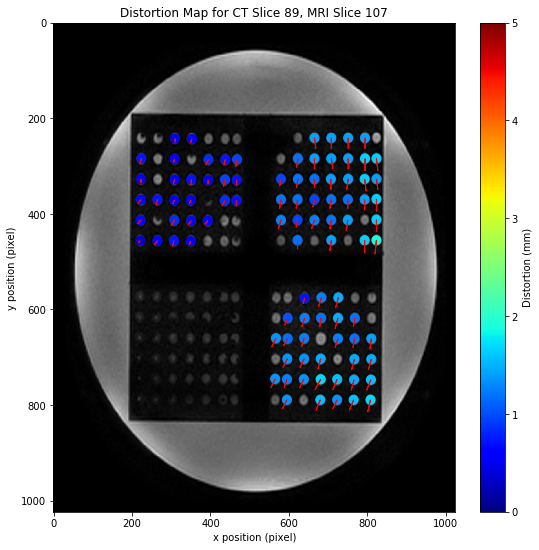


 ################## 
 CT SLICE NUMBER: 90   MRI SLICE NUMBER: 108
LEN CT, MRI: 52 104
LEN CT, MRI: 52 104
CENTRO: 112.5 127.5 88.125

 Insert distance isocenter:  [90.08529215849417, 57.655591544343075, 49.84127393928274, 75.05257597282221, 66.17125516238622, 81.70334612228636, 32.9007889580554, 51.69848073354042, 42.6469884634308, 49.25144995089612, 57.627001812437065, 88.18189791074258, 72.92400930292094, 64.45551889493734, 35.81539718865687, 54.074440968128606, 41.062886461271205, 86.02891302901092, 62.445267050058526, 60.21139720614051, 75.33820878627922, 91.23891467340704, 83.35141421687531, 75.98364403051653, 69.44765691354353, 55.00458077514999, 59.0953302439425, 57.66654718346244, 63.64419260194229, 61.913437003938206, 67.27118516508851, 73.88227841947706, 81.06245482361886, 97.2175006448974, 90.02154825590718, 83.21785227641963, 71.86398353073847, 64.10643310639736, 66.12142778926227, 75.14912583178364, 87.57650673125755, 97.12733517543478, 90.85731134801769, 85.3201032555121

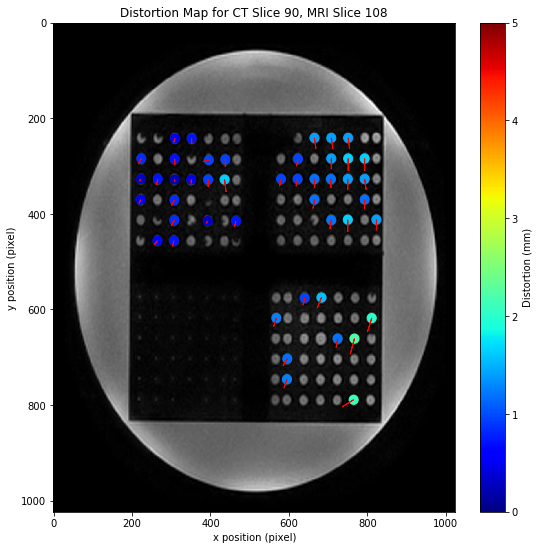


 ################## 
 CT SLICE NUMBER: 90   MRI SLICE NUMBER: 109
LEN CT, MRI: 52 75
LEN CT, MRI: 52 75
CENTRO: 112.5 127.5 88.125

 Insert distance isocenter:  [90.7960522032931, 57.99066507920154, 50.22850373931743, 75.31028588550338, 82.33505350187276, 33.48450259541718, 52.071901349540234, 43.098905148506965, 88.40134116143615, 73.09045157425233, 64.56214076013318, 86.25383398407936, 62.754771746482554, 91.45102268854761, 83.76112624321172, 76.23820669556866, 69.72608587021969, 59.422285858427095, 64.07018627670166, 97.416592178338, 90.23651783169952, 83.45035013407673, 72.02448619273952, 97.32661115173615, 91.07030814371183, 85.54688784246478]


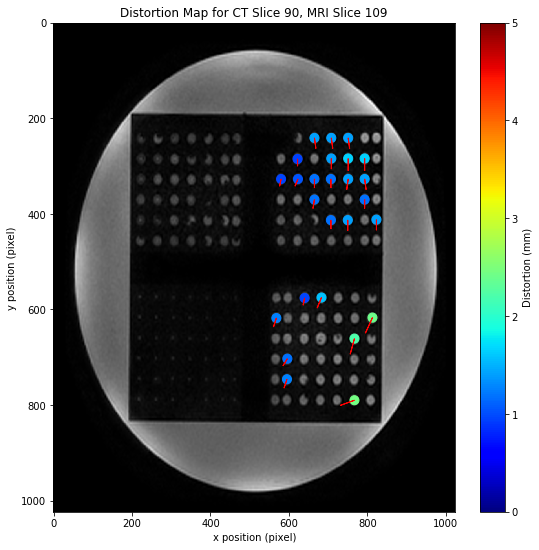


 ################## 
 CT SLICE NUMBER: 91   MRI SLICE NUMBER: 110
LEN CT, MRI: 13 42
No matched inserts found for MRI slice 110

 ################## 
 CT SLICE NUMBER: 141   MRI SLICE NUMBER: 172
LEN CT, MRI: 4 19
No matched inserts found for MRI slice 172

 ################## 
 CT SLICE NUMBER: 142   MRI SLICE NUMBER: 173
LEN CT, MRI: 0 26
No matched inserts found for MRI slice 173

 ################## 
 CT SLICE NUMBER: 142   MRI SLICE NUMBER: 174
LEN CT, MRI: 0 16
No matched inserts found for MRI slice 174

 ################## 
 CT SLICE NUMBER: 144   MRI SLICE NUMBER: 176
LEN CT, MRI: 0 20
No matched inserts found for MRI slice 176

 ################## 
 CT SLICE NUMBER: 145   MRI SLICE NUMBER: 177
LEN CT, MRI: 3 23
No matched inserts found for MRI slice 177

 ################## 
 CT SLICE NUMBER: 146   MRI SLICE NUMBER: 178
LEN CT, MRI: 3 17
No matched inserts found for MRI slice 178

 ################## 
 CT SLICE NUMBER: 170   MRI SLICE NUMBER: 208
LEN CT, MRI: 0 15
No matched 

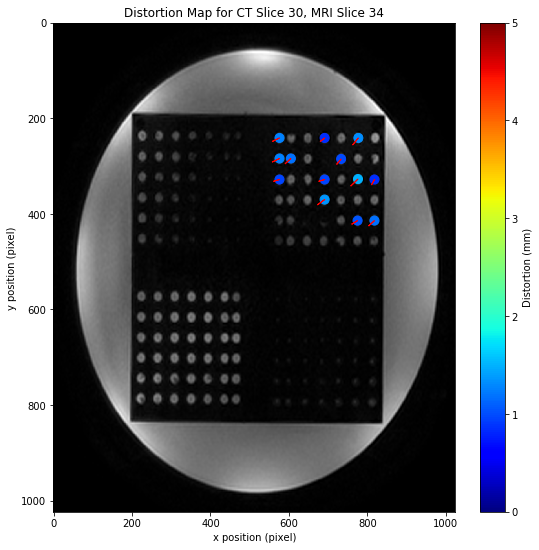


 ################## 
 CT SLICE NUMBER: 31   MRI SLICE NUMBER: 35
LEN CT, MRI: 38 96
LEN CT, MRI: 38 96
CENTRO: 112.5 127.5 88.125

 Insert distance isocenter:  [104.36274371340869, 111.14718959067858, 98.28313914122363, 99.35404899037205, 92.38663080111348, 92.94238202753965]


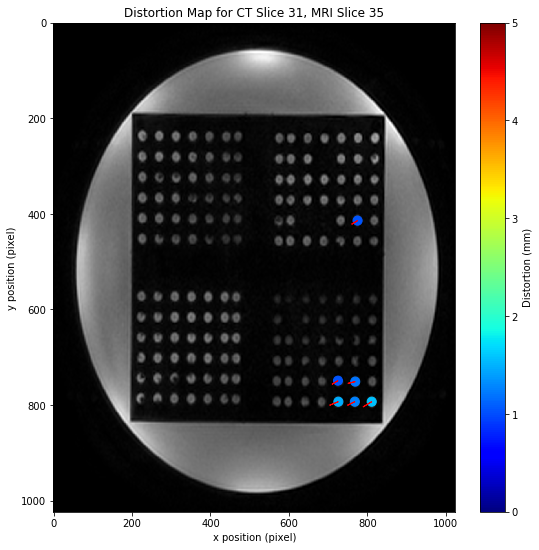


 ################## 
 CT SLICE NUMBER: 32   MRI SLICE NUMBER: 36
LEN CT, MRI: 75 110
LEN CT, MRI: 75 110
CENTRO: 112.5 127.5 88.125

 Insert distance isocenter:  [110.66366953027651, 92.15074744084419, 105.86845556072167, 80.9607984082806, 98.6979750714427, 92.07381761730639, 86.12086262059633, 76.86777468586072, 74.67070450536893, 101.66872449782984, 94.1790313254827, 87.36743585373357, 81.15258583372436, 75.65296003018074, 68.75093216697593, 67.69453485199618, 75.92982375039222, 98.5119076419984, 66.36487681748531, 63.782208851807766, 59.67492095852537, 60.45729259994715, 88.18288214344663, 80.61811077640216, 96.16540138650764, 73.92544841817414, 67.87808248640536, 56.68667309209458, 86.8402161704544, 79.17115958330801, 72.25396865451839, 65.91847511379586, 60.63647604010725, 57.88530044676714, 53.68864594236849, 66.8933422567691, 69.00255458359857, 82.81990680319934, 99.94569448306979, 85.08224995739417, 67.78819408873863, 62.304430348215405, 61.63963481460711, 78.93733917244107, 8

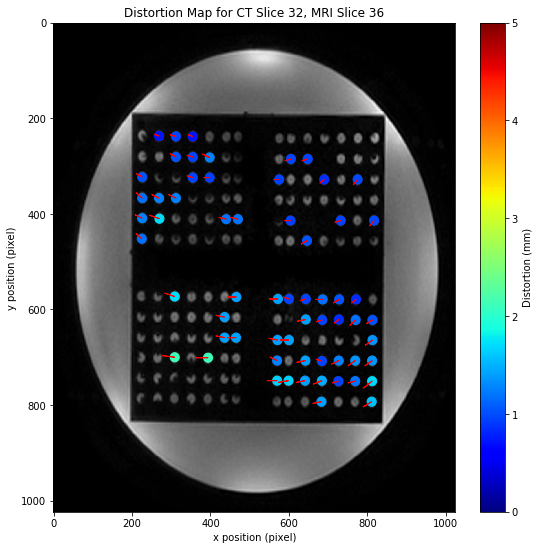


 ################## 
 CT SLICE NUMBER: 33   MRI SLICE NUMBER: 37
LEN CT, MRI: 41 81
LEN CT, MRI: 41 81
CENTRO: 112.5 127.5 88.125

 Insert distance isocenter:  [110.1871033919408, 91.42871118262373, 82.82752811754375, 63.87729707831453, 86.21010881171723, 52.69934253029159, 56.32697857709927, 68.16516340443354, 62.95914551442269, 66.79965454743198, 100.3012077464206, 87.76327023056115, 75.99779145896692, 93.68369530299816, 78.95577189804192, 89.17553271366326, 101.68519751926162, 96.74202819628732]


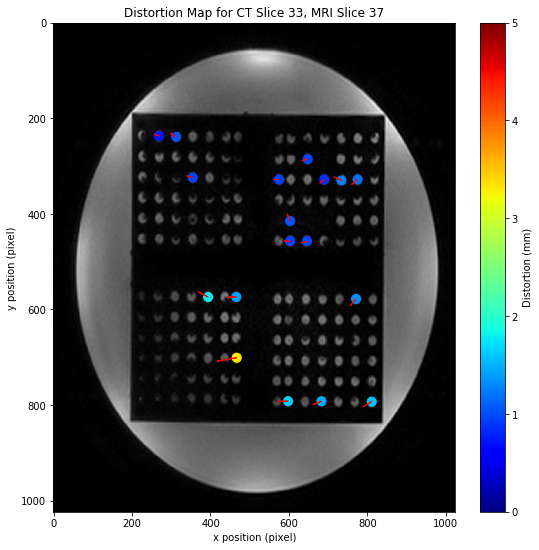


 ################## 
 CT SLICE NUMBER: 34   MRI SLICE NUMBER: 38
LEN CT, MRI: 28 52
LEN CT, MRI: 28 52
CENTRO: 112.5 127.5 88.125

 Insert distance isocenter:  [86.11715454333489, 73.06192859592642, 97.70659202428463, 86.16593786210564, 74.14261555547019, 97.51581652560907, 93.85633162620476, 64.45702450324946, 104.85319094043169]


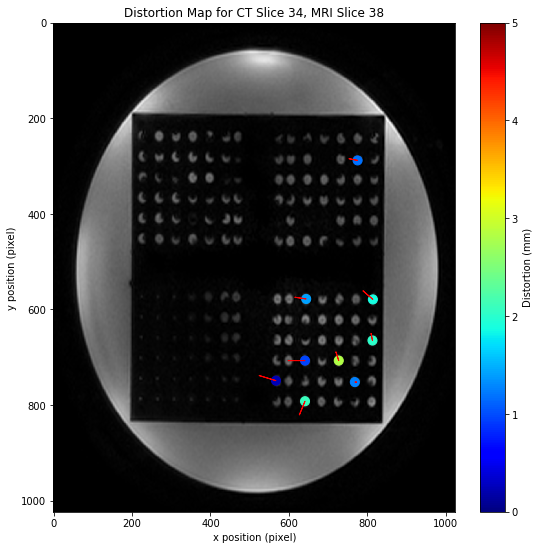


 ################## 
 CT SLICE NUMBER: 34   MRI SLICE NUMBER: 39
LEN CT, MRI: 28 20
LEN CT, MRI: 28 20
CENTRO: 112.5 127.5 88.125

 Insert distance isocenter:  [97.18707797336022, 85.89418510677105, 73.45663646945897, 97.06406575725192, 63.55537463135002]


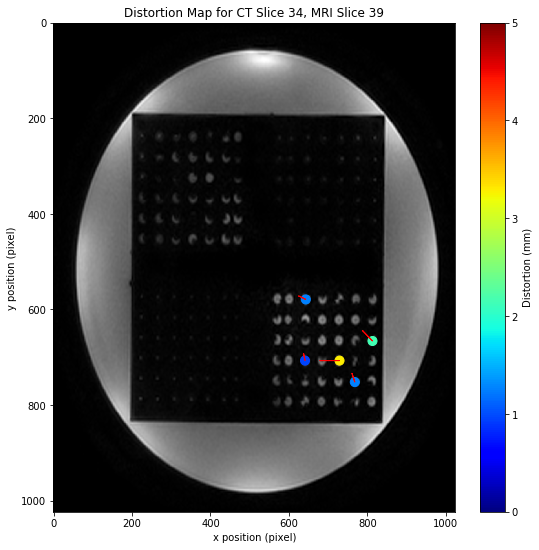

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(p1, p2, conversion1, conversion2):
    #return np.sqrt((p1[0]*conversion1 - p2[0]*conversion2)**2 + (p1[1]*conversion1 - p2[1]*conversion2)**2)
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

mri_folder = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/AA_UPSCALE/Test 2"
#mri_folder = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/AA_UPSCALE/Test 6"
#ct_folder = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/CT PNG 256x256 NO ZOOM"
ct_folder = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/AA_UPSCALE/CT_UPSCALE_1024_zoom"

#mri_folder = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/TEST 2 PNG"

#resolution_quotient = resolution_quotient
resolution_quotient = 1 #2 #512/256 RESOLUÇÃO CT/ RESOLUÇÃO MRI


# Define the slice thickness ratios em mm
#mri_slice_thickness = 1
#ct_slice_thickness = 1.25
slice_thickness_ratio = ct_slice_thickness/mri_slice_thickness

# Define the pixel-to-mm conversion factors
#ct_conversion_factor = 1 / 1.0240005242882684  # mm/pixel
#mri_conversion_factor = 0.9375
ct_conversion_factor = ct_pixel_spacing[0]
mri_conversion_factor = mri_pixel_spacing[0]
print('CT, MRI CONVERSION: ', ct_conversion_factor,mri_conversion_factor)

#em mm
registo_x = 0 #-5.7 #5.7
registo_y = 0 #18.3 #-18.3
registo_z = -4 # 12

x_distances = []
y_distances = []

inserts_info = {}
x_y_distances = {}

# Loop over all slices in slices_15_plus_points_mri
for slice_number_mri in slices_15_plus_points_mri: #tirar [:4] no fim para correr para tudo
    x_distances = []
    y_distances = []
    # Calculate the corresponding CT slice number
    ###slice_number = int(slice_number_mri - registo_z * (1 / mri_conversion_factor))
    slice_number = round((slice_number_mri - registo_z/mri_slice_thickness)/slice_thickness_ratio)
    
    print('\n ################## \n CT SLICE NUMBER:', slice_number, '  MRI SLICE NUMBER:', slice_number_mri)

    # Check if the slice_number exists in the slices_centers_ct dictionary
    if slice_number not in slices_centers_ct:
        print("No CT centers found for CT slice", slice_number)
        continue  # Skip this slice and move to the next one

    # Initialize arrays to hold the matched centers and their distances
    matched_ct_centers = []
    matched_mri_centers = []
    distances = []
    matched_ct_dict = {}  # To keep track of matched CT centers and their distances

    # Get the CT and MRI blob centers for this slice
    #ct_centers = slices_centers_ct[slice_number]
    #print('CT CENTERS before: ', slices_centers_ct[slice_number],'\n')
    ct_centers = [np.divide(ct_center, resolution_quotient) for ct_center in slices_centers_ct[slice_number]]
    #print('CT CENTERS after: ', ct_centers,'\n')
    mri_centers = slices_centers_mri.get(slice_number_mri, [])
    #print('MRI CENTERS: ', mri_centers)
    print('LEN CT, MRI:', len(ct_centers), len(mri_centers))

    # Apply translation to MRI centers
    translated_mri_centers = []
    for mri_center in mri_centers:
#         translated_center = (
#             resolution_quotient*(mri_center[0] + registo_x / mri_conversion_factor),
#             resolution_quotient*(mri_center[1] + registo_y / mri_conversion_factor),
#         )
        translated_center = (
            mri_center[0] + registo_x / mri_conversion_factor,
            mri_center[1] + registo_y / mri_conversion_factor,
        )
        #print('Translated center MRI: ', translated_center)
        translated_mri_centers.append(translated_center)
    #print('Translated MRI CENTERS:', translated_mri_centers)
    # Loop over all pairs of CT and translated MRI blob centers
    for ct_index, ct_center in enumerate(ct_centers):
        #print('CT INDEX, CT CENTER: ', ct_index, ct_center)
        #print('Translated MRI CENTERS:', translated_mri_centers)
        ct_distances = [euclidean_distance(ct_center, mri_center, ct_conversion_factor,mri_conversion_factor) for mri_center in translated_mri_centers]
        #ct_distances = [euclidean_distance((ct_center[0] - 29, ct_center[1] - 29), mri_center, ct_conversion_factor, mri_conversion_factor) for mri_center in translated_mri_centers]
        #if slice_number_mri % 3 == 0:
            #print('CT Distances: ',ct_distances)
        if len(ct_distances) > 0:
            min_distance = min(ct_distances)*mri_conversion_factor/4
            ##print('MIN DISTANCE:', min_distance)
            if min_distance < 4.75:  # adjust as needed
                min_index = np.argmin(ct_distances)
                #print('Min Distance MRI Center:', translated_mri_centers[min_index])
                #print('MATCHED CT DICT:', matched_ct_dict)
                if ct_index in matched_ct_dict:
                    ##print('MAIN LOOP \n')
                    if min_distance < matched_ct_dict[ct_index]:
                        matched_ct_dict[ct_index] = min_distance
                        matched_mri_centers[ct_index] = translated_mri_centers[min_index]
                        
                else:
                    ##print('ELSE LOOP \n') #está a ser muito usado
                    matched_ct_dict[ct_index] = min_distance
                    matched_ct_centers.append(ct_center)
                    matched_mri_centers.append(translated_mri_centers[min_index])
                    #print('AAAA', translated_mri_centers[min_index])
            else:
                ##print('MIN DISTANCE > THRESHOLD')
                continue
    
    # Check if there are matched inserts for this slice
    if len(matched_mri_centers) == 0:
        print("No matched inserts found for MRI slice", slice_number_mri)
        continue  # Skip this slice and move to the next one

    # Convert matched_mri_centers to a NumPy array
    matched_mri_centers = np.array(matched_mri_centers)
    #print('MATCHED CT: \n', matched_ct_centers,'\n MATCHED MRI: \n', matched_mri_centers,'\n')

    for ct_center, mri_center in zip(matched_ct_centers, matched_mri_centers):
        #0.25 porque resolução está 4 vezes maior, agora
        x_distance = 0.25*(ct_center[0]*mri_conversion_factor - mri_center[0]*mri_conversion_factor) #mudar tudo para mri conversion factor
        y_distance = 0.25*(ct_center[1]* mri_conversion_factor - mri_center[1]*mri_conversion_factor) 
        x_distances.append(x_distance)
        y_distances.append(y_distance)
    # Store the x and y distances for this slice in the slice_distances dictionary
    x_y_distances[slice_number_mri] = {'x_distances': x_distances, 'y_distances': y_distances}
    #print('XY Distances: ', x_y_distances[slice_number_mri])

    distances = np.array(list(matched_ct_dict.values()))
    # Convert distances from pixels to millimeters
    ###distances *= mri_conversion_factor  #AGORA JÁ ESTÃO EM MM RIGHT?

    # Create a dictionary to store the minimum distances for each unique MRI center
    min_distances = {}

    # Initialize a set to keep track of seen center coordinates
    seen_centers = set()
    
    # Loop over the matched centers and distances
    ##print('LEN MATCHED MRI CENTERS:', len(matched_mri_centers))
    print('LEN CT, MRI:', len(ct_centers), len(mri_centers))
    for i in range(len(matched_mri_centers)):
        center = tuple(matched_mri_centers[i])  # Convert the array to a tuple for dictionary keys
        distance = distances[i]
        #print('Distance: ', distance)
        # Check if the center coordinates have been seen before
        if center in seen_centers and i%5 == 0: #para não dar print a todos
            print("Warning: Duplicate matched MRI center found with coordinates", center)
            continue
        # Check if the center is already in the dictionary
        if center in min_distances:
            # If the current distance is smaller than the stored distance, update the value in the dictionary
            if distance < min_distances[center]:
                min_distances[center] = distance
        else:
            # If the center is not in the dictionary, add it with the current distance
            min_distances[center] = distance
        # Add the center coordinates to the set of seen centers
        seen_centers.add(center)


    # Plot the distortion map using scatter plot
    plt.figure(figsize=(9, 9))

    # Initialize lists to hold the coordinates and distances of the minimum distance points
    min_distance_centers = []
    min_distance_values = []

    # Loop over the unique centers and their corresponding minimum distances
    for center, distance in min_distances.items():
        min_distance_centers.append(center)
        min_distance_values.append(distance)
    
    # Convert the lists to NumPy arrays
    min_distance_centers = np.array(min_distance_centers)
    min_distance_values = np.array(min_distance_values)
    if len(min_distance_centers) < 4.75: #para só ter em conta slices com boa concordância, reduzir erros
        continue
        #min_distance_centers = []
        #min_distance_values = []
    
    #print('Min distance centers: \n', min_distance_centers, '\n Min distance values: \n', min_distance_values)
    #print('Min distance values: ',min_distance_values)
    
    #PARA O PLOT
    
    plot_mri_centers = []
    plot_mri_values = []
    #print('min_distance_centers: \n', min_distance_centers)
    for i in range(len(min_distance_centers)):
        mri_center = min_distance_centers[i]
        mri_value = min_distance_values[i]
        if mri_value < 4.75:
            plot_center = (
                mri_center[0] - registo_x / mri_conversion_factor,
                mri_center[1] - registo_y / mri_conversion_factor,
            )
            plot_mri_centers.append(plot_center)
            plot_mri_values.append(mri_value)
            #print(plot_center)
    plot_mri_centers = np.array(plot_mri_centers)
    plot_mri_values = np.array(plot_mri_values)
    
    #print('X PLOT MRI CENTERS: \n', plot_mri_centers[:, 0])
    ##print('LEN PLOT MRI CENTERS: ', len(plot_mri_centers))
    ##print('LEN MIN MRI CENTERS: ', len(min_distance_centers))
    
        
    ########
        # Get the distortion information for the current slice
    insert_centers = min_distance_centers
    distortion_values = min_distance_values

    # Calculate the distance of each insert to the isocenter
    #print('INSERT CENTERS/4:', insert_centers/4)
    print('CENTRO:', mri_conversion_factor*isocenter_eclipse_x,mri_conversion_factor*isocenter_eclipse_y,
                                                        mri_conversion_factor*isocenter_eclipse_z)
    insert_distance_isocenter = [euclidean_distance_3d((mri_conversion_factor* center_1[0]/4,mri_conversion_factor* center_1[1]/4, 
                                                        (slice_number_mri-1)*mri_slice_thickness),
                                                       (mri_conversion_factor*isocenter_eclipse_x,mri_conversion_factor*isocenter_eclipse_y,
                                                        mri_conversion_factor*isocenter_eclipse_z)) for center_1 in insert_centers]
    print('\n Insert distance isocenter: ', insert_distance_isocenter)

    # Store the information for the current slice
    inserts_info[slice_number_mri] = {
        'insert_centers': insert_centers,
        'distortion_values': distortion_values,
        'insert_distances': insert_distance_isocenter
    }
    ###########
    
    # Path to the corresponding MRI slice image file
    slice_filename = os.path.join(mri_folder, "{}.png".format(slice_number_mri))

    # Load the MRI slice image
    img = plt.imread(slice_filename)

    # Plot the MRI slice
    ##plt.imshow(img, cmap="gray", aspect='auto')
    plt.imshow(img, cmap="hot", aspect='auto', origin='lower', alpha=1) #Para não rodar
    #plt.imshow(img, cmap="gray", aspect='auto')
    
    
    #CT OVERLAY
    slice_filename_ct = os.path.join(ct_folder, "{}.png".format(slice_number))
    #extent = [0, img.shape[1], 0, img.shape[0]]
    img_ct = plt.imread(slice_filename_ct)
    #plt.imshow(img_ct, cmap="gray", aspect='auto', origin='lower',alpha=0.1) #Para não rodar
    
    
    # Plot the minimum distance points
    plt.scatter(
        plot_mri_centers[:, 0],          ##min_distance_centers[:, 0],  ##min_distance_centers[:, 1],
        plot_mri_centers[:, 1],
        c=plot_mri_values,
        cmap='jet',
        vmin=0,
        vmax=5,
        s=82
    )
    for x, y, dx, dy in zip(plot_mri_centers[:, 0], plot_mri_centers[:, 1], x_distances, y_distances):
        plt.arrow(x, y, 15*dx, 15*dy, color='red', head_width=1, head_length=1)
    plt.title("Distortion Map for CT Slice {}, MRI Slice {}".format(slice_number, slice_number_mri))
    plt.colorbar(label="Distortion (mm)")
    plt.xlabel('x position (pixel)')
    plt.ylabel('y position (pixel)')
    plt.gca().invert_yaxis()
    plt.show()
    

In [9]:
print(x_y_distances)



{103: {'x_distances': [4.21875], 'y_distances': [0.703125]}, 104: {'x_distances': [4.21875], 'y_distances': [0.703125]}, 106: {'x_distances': [-3.984375, -4.453125, 0.9375, 1.875, 4.6875], 'y_distances': [2.109375, -1.40625, -3.75, 3.75, -0.234375]}, 107: {'x_distances': [0.9375], 'y_distances': [3.515625]}, 36: {'x_distances': [1.875, -0.46875, 1.171875], 'y_distances': [-3.28125, -0.703125, -0.703125]}, 37: {'x_distances': [2.109375, 2.109375], 'y_distances': [-3.046875, 2.109375]}, 38: {'x_distances': [-4.21875, 0.9375], 'y_distances': [-1.40625, -4.453125]}, 39: {'x_distances': [-4.21875], 'y_distances': [-1.640625]}}


In [10]:
x_y_distances['x_distances'][1]

KeyError: 'x_distances'

In [ ]:

slice_number44 = slices_15_plus_points_mri[1]  # Replace with the desired slice number
if slice_number44 in x_y_distances:
    slice_info = x_y_distances[slice_number44]
    x_distances44 = slice_info['x_distances']
    
    print("x_distances:", x_distances44)
else:
    print("No information found for slice", slice_number44)

In [ ]:

slice_number33 = slices_15_plus_points_mri[1]  # Replace with the desired slice number
print('Slice number: ', slice_number33)
if slice_number33 in inserts_info:
    slice_info = inserts_info[slice_number33]
    insert_centers = slice_info['insert_centers']
    distortion_values = slice_info['distortion_values']
    insert_distance_isocenter = slice_info['insert_distances']
    
    print("Insert Centers:", insert_centers)
    print("Distortion Values:", distortion_values)
    print("Insert Distances:", insert_distance_isocenter)
else:
    print("No information found for slice", slice_number33)

In [ ]:
aa

NOVO

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

adasd
# Create a new Excel writer object
output_file = 'RESULTADOS/SADASDASD_upscale.xlsx'
writer = pd.ExcelWriter(output_file, engine='xlsxwriter')

# Create a workbook
workbook = writer.book

# Create a DataFrame to store all insert information
all_insert_data = []

# Loop over the analyzed MRI slices
for slice_number, slice_info in inserts_info.items():
    # Get the information for the current slice
    insert_centers = slice_info['insert_centers']
    distortion_values = slice_info['distortion_values']
    insert_distance_isocenter = slice_info['insert_distances']
    slice_info2 = x_y_distances[slice_number]

    # Determine the maximum number of inserts for the current slice
    max_inserts = max(len(insert_centers), len(distortion_values), len(insert_distance_isocenter))

    # Iterate over each insert
    for i in range(max_inserts):
        # Get the values for the current insert
        center = insert_centers[i] if i < len(insert_centers) else ''
        distortion = distortion_values[i] if i < len(distortion_values) else ''
        distance = insert_distance_isocenter[i] if i < len(insert_distance_isocenter) else ''
        x_distance = slice_info2['x_distances'][i] if i < len(slice_info2['x_distances']) else ''
        y_distance = slice_info2['y_distances'][i] if i < len(slice_info2['y_distances']) else ''

        # Append the insert data to the DataFrame
        all_insert_data.append([slice_number, center, distortion, distance, x_distance, y_distance])

# Create a DataFrame for all inserts
df = pd.DataFrame(all_insert_data,
                  columns=['Slice Number', 'Insert Centers', 'Distortion Values', 'Distance to Isocenter',
                           'Distortion X', 'Distortion Y'])

# Add new columns with absolute values of Distortion X and Distortion Y
df['Abs Distortion X'] = df['Distortion X'].abs()
df['Abs Distortion Y'] = df['Distortion Y'].abs()

# Write the DataFrame to the 'All Inserts' sheet in the Excel file
sheet_name = 'All Inserts'
df.to_excel(writer, sheet_name=sheet_name, index=False)

# Create the first page scatter plots
worksheet = writer.sheets[sheet_name]

# Plot 1: Distortion values vs. Distance to Isocenter
chart1 = workbook.add_chart({'type': 'scatter'})
chart1.set_title({'name': 'Distortion Values vs. Distance to Isocenter'})
chart1.add_series({
    'categories': [sheet_name, 1, 3, len(df), 3],
    'values': [sheet_name, 1, 2, len(df), 2],
    'name': 'Distortion Values',
    'marker': {'type': 'circle', 'size': 7},
})
chart1.set_x_axis({'name': 'Distance to Isocenter (mm)'})
chart1.set_y_axis({'name': 'Distortion Values (mm)'})
worksheet.insert_chart('J1', chart1)

# Plot 2: Distortion X vs. Distance to Isocenter
chart2 = workbook.add_chart({'type': 'scatter'})
chart2.set_title({'name': 'Distortion X vs. Distance to Isocenter'})
chart2.add_series({
    'categories': [sheet_name, 1, 3, len(df), 3],
    'values': [sheet_name, 1, 6, len(df), 6],
    'name': 'Distortion X',
    'marker': {'type': 'circle', 'size': 7},
})
chart2.set_x_axis({'name': 'Distance to Isocenter (mm)'})
chart2.set_y_axis({'name': 'Abs Distortion X (mm)'})  # Update y-axis label to 'Abs Distortion X'
worksheet.insert_chart('J17', chart2)

# Plot 3: Distortion Y vs. Distance to Isocenter
chart3 = workbook.add_chart({'type': 'scatter'})
chart3.set_title({'name': 'Distortion Y vs. Distance to Isocenter'})
chart3.add_series({
    'categories': [sheet_name, 1, 3, len(df), 3],
    'values': [sheet_name, 1, 7, len(df), 7],
    'name': 'Distortion Y',
    'marker': {'type': 'circle', 'size': 7},
})
chart3.set_x_axis({'name': 'Distance to Isocenter (mm)'})
chart3.set_y_axis({'name': 'Abs Distortion Y (mm)'})  # Update y-axis label to 'Abs Distortion Y'
worksheet.insert_chart('J33', chart3)

# Loop over each slice to create separate sheets
for slice_number in df['Slice Number'].unique():
    slice_df = df[df['Slice Number'] == slice_number]

    # Create a new sheet for the slice
    sheet_name = f"Slice {slice_number}"
    sheet_name = sheet_name[:31]  # Limit sheet name to 31 characters
    slice_df.to_excel(writer, sheet_name=sheet_name, index=False)

    # Create a scatter plot for the inserts in the slice
    worksheet = writer.sheets[sheet_name]
    chart = workbook.add_chart({'type': 'scatter'})

    # Set the chart title
    chart.set_title({'name': f'Insert Distortion vs. Distance - {sheet_name}'})

    # Add the data series to the chart
    chart.add_series({
        'categories': [sheet_name, 1, 3, len(slice_df), 3],
        'values': [sheet_name, 1, 2, len(slice_df), 2],  # Use 'Distortion Values' column as y-values
        'name': 'Distortion vs. Distance',
        'marker': {'type': 'circle', 'size': 7},
    })

    # Set the x-axis and y-axis labels
    chart.set_x_axis({'name': 'Distance to Isocenter (mm)'})
    chart.set_y_axis({'name': 'Distortion Values (mm)'})  # Update y-axis label

    # Insert the chart into the worksheet
    worksheet.insert_chart('J1', chart)

# Save and close the Excel writer
writer.save()
writer.close()

print("Data and scatter plots saved to", output_file)

In [ ]:
asdasd

Posição de 1 slice

In [ ]:
import pydicom

# Load a DICOM image or series
dcm = pydicom.dcmread("C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/FSPGR 3D/EE0CEDE4")

# Access the isocenter position from the DICOM metadata
isocenter_x = dcm.ImagePositionPatient[0]
isocenter_y = dcm.ImagePositionPatient[1]
isocenter_z = dcm.ImagePositionPatient[2]

# Print the isocenter position
print("Isocenter X:", isocenter_x)
print("Isocenter Y:", isocenter_y)
print("Isocenter Z:", isocenter_z)


Imaging time:

In [ ]:
import pydicom
from datetime import datetime

# Read the DICOM images
dcm_first = pydicom.dcmread("C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/FSPGR 3D/EE0C6DD3")
dcm_last = pydicom.dcmread("C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/FSPGR 3D/EEFEA56D")

# Extract acquisition times of the first and last images
acquisition_time_first = dcm_first.AcquisitionTime
acquisition_time_last = dcm_last.AcquisitionTime

# Convert acquisition times to datetime objects
datetime_first = datetime.strptime(acquisition_time_first, "%H%M%S")
datetime_last = datetime.strptime(acquisition_time_last, "%H%M%S")

# Calculate the duration in seconds
duration_seconds = (datetime_last - datetime_first).total_seconds()

# Print the duration in seconds
print("Duration of MRI imaging (seconds):", duration_seconds)

In [ ]:
import pydicom

# Read the DICOM image
dcm = pydicom.dcmread("C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/FSPGR 3D/EE0C6DD3")

# Access the relevant DICOM attributes
acquisition_matrix = dcm[0x0018, 0x1310].value if (0x0018, 0x1310) in dcm else None
rows = dcm[0x0028, 0x0010].value if (0x0028, 0x0010) in dcm else None
num_frames = dcm[0x0028, 0x0008].value if (0x0028, 0x0008) in dcm else None

# Determine the number of phase encoding steps
phase_steps = None
if acquisition_matrix:
    phase_steps = acquisition_matrix[1]
elif rows:
    phase_steps = rows
elif num_frames:
    phase_steps = num_frames

# Print the number of phase encoding steps
print("Number of Phase Encoding Steps:", phase_steps)

In [ ]:
asdasd

Downscale images to 256x256 a partir de 512x512

In [ ]:
import os
import cv2
asdads

input_folder = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/CT PNG"
output_folder = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/CT PNG 256x256 NO ZOOM"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Loop over the files in the input folder
for filename in os.listdir(input_folder):
    # Check if the file is an image (you can modify this condition if needed)
    if filename.endswith(".png") or filename.endswith(".jpg"):
        # Read the image
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path)
        
        # Resize the image to 256x256 using bilinear interpolation
        resized_image = cv2.resize(image, (256, 256), interpolation=cv2.INTER_LINEAR)
        
        # Save the resized image to the output folder
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, resized_image)


In [ ]:
asdasd

Com zoom no centro

In [ ]:
import os
import cv2

asdasd
input_folder = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/AA_UPSCALE/CT_UPSCALE_1024"
output_folder = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/AA_UPSCALE/CT_UPSCALE_1024_zoom"
zoom_factor = 0.8

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Get the list of image files in the input folder
image_files = [f for f in os.listdir(input_folder) if f.endswith(".png")]

# Process each image file
for image_file in image_files:
    # Read the image
    image_path = os.path.join(input_folder, image_file)
    image = cv2.imread(image_path)
    
    
    # Get the image dimensions
    height, width = image.shape[:2]
    
    # Calculate the zoomed-in region
    zoomed_width = int(width * zoom_factor)
    zoomed_height = int(height * zoom_factor)
    x_start = (width - zoomed_width) // 2
    y_start = (height - zoomed_height) // 2
    x_end = x_start + zoomed_width
    y_end = y_start + zoomed_height
    
    # Zoom in on the center region
    zoomed_image = image[y_start:y_end, x_start:x_end]
    
    # Resize the zoomed image to 256x256
    resized_image = cv2.resize(zoomed_image, (1024, 1024))
    
    # Save the resized image to the output folder
    output_path = os.path.join(output_folder, image_file)
    cv2.imwrite(output_path, resized_image)
    
    print("Processed:", image_file)

print("Image processing completed.")


UPSCALE com interpolação cúbica (boa para reduzir artefactos de interpolação)

In [ ]:
import os
import cv2


input_folder = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/TEST 12 PNG"
output_folder = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/AA_UPSCALE/Test 12"

# input_folder = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/FSPGR 3D OPTIMIZED PNG"
# output_folder = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/AA_UPSCALE/MRI_OPTIMIZED_1024"


# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Get the list of image files in the input folder
image_files = [f for f in os.listdir(input_folder) if f.endswith(".png")]

# Process each image file
for image_file in image_files:
    # Read the image
    image_path = os.path.join(input_folder, image_file)
    image = cv2.imread(image_path)
    
    # Resize the image to 512x512 using interpolation
    resized_image = cv2.resize(image, (1024, 1024), interpolation=cv2.INTER_CUBIC)
    
    # Save the resized image to the output folder
    output_path = os.path.join(output_folder, image_file)
    cv2.imwrite(output_path, resized_image)
    
    print("Processed:", image_file)

print("Image processing completed.")


## Cálculo SNR e CNR

#### Versão para OPTIMIZED

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# def euclidean_distance(p1, p2, conversion1, conversion2):
#     #return np.sqrt((p1[0]*conversion1 - p2[0]*conversion2)**2 + (p1[1]*conversion1 - p2[1]*conversion2)**2)
#     return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# #mri_folder = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/FSPGR 3D OPTIMIZED PNG"
# mri_folder = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/AA_UPSCALE/MRI_OPTIMIZED_1024"
# #ct_folder = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/CT PNG 256x256 NO ZOOM"
# ct_folder = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/AA_UPSCALE/CT_UPSCALE_1024_zoom"

# #mri_folder = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/TEST 2 PNG"

# #resolution_quotient = resolution_quotient
# resolution_quotient = 1 #2 #512/256 RESOLUÇÃO CT/ RESOLUÇÃO MRI


# # Define the slice thickness ratios em mm
# #mri_slice_thickness = 1
# #ct_slice_thickness = 1.25
# slice_thickness_ratio = ct_slice_thickness/mri_slice_thickness

# # Define the pixel-to-mm conversion factors
# #ct_conversion_factor = 1 / 1.0240005242882684  # mm/pixel
# #mri_conversion_factor = 0.9375
# ct_conversion_factor = ct_pixel_spacing[0]
# mri_conversion_factor = mri_pixel_spacing[0]
# print('CT, MRI CONVERSION: ', ct_conversion_factor,mri_conversion_factor)

# #em mm
# registo_x = 0 #-5.7 #5.7
# registo_y = 0 #18.3 #-18.3
# registo_z = -12 # 12

# x_distances = []
# y_distances = []

# inserts_info = {}
# x_y_distances = {}

# # Loop over all slices in slices_15_plus_points_mri
# for slice_number_mri in slices_15_plus_points_mri: #tirar [:4] no fim para correr para tudo
#     x_distances = []
#     y_distances = []
#     # Calculate the corresponding CT slice number
#     ###slice_number = int(slice_number_mri - registo_z * (1 / mri_conversion_factor))
#     slice_number = round((slice_number_mri - registo_z/mri_slice_thickness)/slice_thickness_ratio)
    
#     print('\n ################## \n CT SLICE NUMBER:', slice_number, '  MRI SLICE NUMBER:', slice_number_mri)

#     # Check if the slice_number exists in the slices_centers_ct dictionary
#     if slice_number not in slices_centers_ct:
#         print("No CT centers found for CT slice", slice_number)
#         continue  # Skip this slice and move to the next one

#     # Initialize arrays to hold the matched centers and their distances
#     matched_ct_centers = []
#     matched_mri_centers = []
#     distances = []
#     matched_ct_dict = {}  # To keep track of matched CT centers and their distances

#     # Get the CT and MRI blob centers for this slice
#     #ct_centers = slices_centers_ct[slice_number]
#     #print('CT CENTERS before: ', slices_centers_ct[slice_number],'\n')
#     ct_centers = [np.divide(ct_center, resolution_quotient) for ct_center in slices_centers_ct[slice_number]]
#     #print('CT CENTERS after: ', ct_centers,'\n')
#     mri_centers = slices_centers_mri.get(slice_number_mri, [])
#     #print('MRI CENTERS: ', mri_centers)
#     print('LEN CT, MRI:', len(ct_centers), len(mri_centers))

#     # Apply translation to MRI centers
#     translated_mri_centers = []
#     for mri_center in mri_centers:
# #         translated_center = (
# #             resolution_quotient*(mri_center[0] + registo_x / mri_conversion_factor),
# #             resolution_quotient*(mri_center[1] + registo_y / mri_conversion_factor),
# #         )
#         translated_center = (
#             mri_center[0] + registo_x / mri_conversion_factor,
#             mri_center[1] + registo_y / mri_conversion_factor,
#         )
#         #print('Translated center MRI: ', translated_center)
#         translated_mri_centers.append(translated_center)
#     #print('Translated MRI CENTERS:', translated_mri_centers)
#     # Loop over all pairs of CT and translated MRI blob centers
#     for ct_index, ct_center in enumerate(ct_centers):
#         #print('CT INDEX, CT CENTER: ', ct_index, ct_center)
#         #print('Translated MRI CENTERS:', translated_mri_centers)
#         ct_distances = [euclidean_distance(ct_center, mri_center, ct_conversion_factor,mri_conversion_factor) for mri_center in translated_mri_centers]
#         #ct_distances = [euclidean_distance((ct_center[0] - 29, ct_center[1] - 29), mri_center, ct_conversion_factor, mri_conversion_factor) for mri_center in translated_mri_centers]
#         print('CT Distances: ',ct_distances)
#         if len(ct_distances) > 0:
#             min_distance = min(ct_distances)*mri_conversion_factor/4
#             ##print('MIN DISTANCE:', min_distance)
#             if min_distance < 500:  # adjust as needed
#                 min_index = np.argmin(ct_distances)
#                 #print('Min Distance MRI Center:', translated_mri_centers[min_index])
#                 #print('MATCHED CT DICT:', matched_ct_dict)
#                 if ct_index in matched_ct_dict:
#                     ##print('MAIN LOOP \n')
#                     if min_distance < matched_ct_dict[ct_index]:
#                         matched_ct_dict[ct_index] = min_distance
#                         matched_mri_centers[ct_index] = translated_mri_centers[min_index]
                        
#                 else:
#                     ##print('ELSE LOOP \n') #está a ser muito usado
#                     matched_ct_dict[ct_index] = min_distance
#                     matched_ct_centers.append(ct_center)
#                     matched_mri_centers.append(translated_mri_centers[min_index])
#                     #print('AAAA', translated_mri_centers[min_index])
#             else:
#                 ##print('MIN DISTANCE > THRESHOLD')
#                 continue
    
#     # Check if there are matched inserts for this slice
#     if len(matched_mri_centers) == 0:
#         print("No matched inserts found for MRI slice", slice_number_mri)
#         continue  # Skip this slice and move to the next one

#     # Convert matched_mri_centers to a NumPy array
#     matched_mri_centers = np.array(matched_mri_centers)
#     #print('MATCHED CT: \n', matched_ct_centers,'\n MATCHED MRI: \n', matched_mri_centers,'\n')

#     for ct_center, mri_center in zip(matched_ct_centers, matched_mri_centers):
#         #0.25 porque resolução está 4 vezes maior, agora
#         x_distance = 0.25*(ct_center[0]*mri_conversion_factor - mri_center[0]*mri_conversion_factor) #mudar tudo para mri conversion factor
#         y_distance = 0.25*(ct_center[1]* mri_conversion_factor - mri_center[1]*mri_conversion_factor) 
#         x_distances.append(x_distance)
#         y_distances.append(y_distance)
#     # Store the x and y distances for this slice in the slice_distances dictionary
#     x_y_distances[slice_number_mri] = {'x_distances': x_distances, 'y_distances': y_distances}
#     print('XY Distances: ', x_y_distances[slice_number_mri])

#     distances = np.array(list(matched_ct_dict.values()))
#     # Convert distances from pixels to millimeters
#     ###distances *= mri_conversion_factor  #AGORA JÁ ESTÃO EM MM RIGHT?

#     # Create a dictionary to store the minimum distances for each unique MRI center
#     min_distances = {}

#     # Initialize a set to keep track of seen center coordinates
#     seen_centers = set()
    
#     # Loop over the matched centers and distances
#     ##print('LEN MATCHED MRI CENTERS:', len(matched_mri_centers))
#     print('LEN CT, MRI:', len(ct_centers), len(mri_centers))
#     for i in range(len(matched_mri_centers)):
#         center = tuple(matched_mri_centers[i])  # Convert the array to a tuple for dictionary keys
#         distance = distances[i]
#         #print('Distance: ', distance)
#         # Check if the center coordinates have been seen before
#         if center in seen_centers and i%5 == 0: #para não dar print a todos
#             print("Warning: Duplicate matched MRI center found with coordinates", center)
#             continue
#         # Check if the center is already in the dictionary
#         if center in min_distances:
#             # If the current distance is smaller than the stored distance, update the value in the dictionary
#             if distance < min_distances[center]:
#                 min_distances[center] = distance
#         else:
#             # If the center is not in the dictionary, add it with the current distance
#             min_distances[center] = distance
#         # Add the center coordinates to the set of seen centers
#         seen_centers.add(center)


#     # Plot the distortion map using scatter plot
#     plt.figure(figsize=(9, 9))

#     # Initialize lists to hold the coordinates and distances of the minimum distance points
#     min_distance_centers = []
#     min_distance_values = []

#     # Loop over the unique centers and their corresponding minimum distances
#     for center, distance in min_distances.items():
#         min_distance_centers.append(center)
#         min_distance_values.append(distance)
    
#     # Convert the lists to NumPy arrays
#     min_distance_centers = np.array(min_distance_centers)
#     min_distance_values = np.array(min_distance_values)
#     if len(min_distance_centers) < 5: #para só ter em conta slices com boa concordância, reduzir erros
#         continue
#         #min_distance_centers = []
#         #min_distance_values = []
    
#     #print('Min distance centers: \n', min_distance_centers, '\n Min distance values: \n', min_distance_values)
#     #print('Min distance values: ',min_distance_values)
    
#     #PARA O PLOT
    
#     plot_mri_centers = []
#     plot_mri_values = []
#     #print('min_distance_centers: \n', min_distance_centers)
#     for i in range(len(min_distance_centers)):
#         mri_center = min_distance_centers[i]
#         mri_value = min_distance_values[i]
#         if mri_value < 500:
#             plot_center = (
#                 mri_center[0] - registo_x / mri_conversion_factor,
#                 mri_center[1] - registo_y / mri_conversion_factor,
#             )
#             plot_mri_centers.append(plot_center)
#             plot_mri_values.append(mri_value)
#             #print(plot_center)
#     plot_mri_centers = np.array(plot_mri_centers)
#     plot_mri_values = np.array(plot_mri_values)
    
#     #print('X PLOT MRI CENTERS: \n', plot_mri_centers[:, 0])
#     ##print('LEN PLOT MRI CENTERS: ', len(plot_mri_centers))
#     ##print('LEN MIN MRI CENTERS: ', len(min_distance_centers))
    
        
#     ########
#         # Get the distortion information for the current slice
#     insert_centers = min_distance_centers
#     distortion_values = min_distance_values

#     # Calculate the distance of each insert to the isocenter
#     print('INSERT CENTERS/4:', insert_centers/4)
#     print('CENTRO:', mri_conversion_factor*isocenter_eclipse_x,mri_conversion_factor*isocenter_eclipse_y,
#                                                         mri_conversion_factor*isocenter_eclipse_z)
#     insert_distance_isocenter = [euclidean_distance_3d((mri_conversion_factor* center_1[0]/4,mri_conversion_factor* center_1[1]/4, 
#                                                         (slice_number_mri-1)*mri_slice_thickness),
#                                                        (mri_conversion_factor*isocenter_eclipse_x,mri_conversion_factor*isocenter_eclipse_y,
#                                                         mri_conversion_factor*isocenter_eclipse_z)) for center_1 in insert_centers]
#     print('\n Insert distance isocenter: ', insert_distance_isocenter)

#     # Store the information for the current slice
#     inserts_info[slice_number_mri] = {
#         'insert_centers': insert_centers,
#         'distortion_values': distortion_values,
#         'insert_distances': insert_distance_isocenter
#     }
#     ###########
    
#     # Path to the corresponding MRI slice image file
#     slice_filename = os.path.join(mri_folder, "{}.png".format(slice_number_mri))

#     # Load the MRI slice image
#     img = plt.imread(slice_filename)

#     # Plot the MRI slice
#     ##plt.imshow(img, cmap="gray", aspect='auto')
#     plt.imshow(img, cmap="hot", aspect='auto', origin='lower', alpha=1) #Para não rodar
#     #plt.imshow(img, cmap="gray", aspect='auto')
    
    
#     #CT OVERLAY
#     slice_filename_ct = os.path.join(ct_folder, "{}.png".format(slice_number))
#     #extent = [0, img.shape[1], 0, img.shape[0]]
#     img_ct = plt.imread(slice_filename_ct)
#     #plt.imshow(img_ct, cmap="gray", aspect='auto', origin='lower',alpha=0.1) #Para não rodar
    
    
#     # Plot the minimum distance points
#     plt.scatter(
#         plot_mri_centers[:, 0],          ##min_distance_centers[:, 0],  ##min_distance_centers[:, 1],
#         plot_mri_centers[:, 1],
#         c=plot_mri_values,
#         cmap='jet',
#         vmin=0,
#         vmax=300,
#         s=82
#     )
#     for x, y, dx, dy in zip(plot_mri_centers[:, 0], plot_mri_centers[:, 1], x_distances, y_distances):
#         plt.arrow(x, y, dx, dy, color='red', head_width=1, head_length=1)
#     plt.title("Distortion Map for CT Slice {}, MRI Slice {}".format(slice_number, slice_number_mri))
#     plt.colorbar(label="Distortion (mm)")
#     plt.xlabel('x position (pixel)')
#     plt.ylabel('y position (pixel)')
#     plt.gca().invert_yaxis()
#     plt.show()
    

# SNR, CNR calculation

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#import image
img = cv2.imread("C:/Users/bernc/Downloads/converted.jpg", 0)

#Thresh
ret, thresh = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)
#Original: ret, thresh = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)

#Finding the contours in the image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS) 
#original: cv2.CHAIN_APPROX_SIMPLE no 2º parâmetro

#print(len(a))

#Convert img to RGB and draw contour
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
contours = sorted(contours, key=cv2.contourArea, reverse=True)
largest_contour = contours[10]
#cv2.drawContours(img, contours, 0, (0,0,255), 2)
cv2.drawContours(img, largest_contour, -1, (0,0,255), 2)


#save output img
#cv2.imwrite('output_img.png', img)

# display it
plt.figure(figsize=(12,12))
imgplot = plt.imshow(img)

cv2.imshow("IMAGE", img)
cv2.waitKey(0)

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def calculate_snr_cnr(image_folder):
    # Load images from the folder
    image_files = os.listdir(image_folder)
    image_paths = [os.path.join(image_folder, file) for file in image_files]

    # Calculate signal, noise, and signal_insert for each image
    snr_values = []
    cnr_values = []
    counter_crazy = 0
    cnr_count = 0
    
    # Exclude the first and last 15 images
    image_paths = image_paths[15:-15]
    for image_path in image_paths:
        counter_crazy+=1
        if counter_crazy%30 == 0:
            print(counter_crazy, 'slices out of 214 have been processed.')
        # Load the image
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Automatic ROI detection using image processing techniques
        _, threshold = cv2.threshold(image, 210, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)
        #contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Sort contours by area in descending order
        contours = sorted(contours, key=cv2.contourArea, reverse=True)
        print('LEN CONTOURS', len(contours))
        contours_new = []
       # min_area = 500
        for contour in contours:
            contour_area = cv2.contourArea(contour)
            perimeter = cv2.arcLength(contour, True) 
            circularity = 4 * np.pi * (contour_area / (perimeter ** 2 - 0.01))

            if contour_area >= 100 and circularity > 0.7:
                contours_new.append(contour)

        # Select the largest contour as the ROI
        largest_contour = contours[0]
       # x, y, w, h = cv2.boundingRect(largest_contour)
        (x, y), radius = cv2.minEnclosingCircle(largest_contour)
        x,y,radius = round(x),round(y),round(radius)
        #print('x,y, radius: ', x,y,radius)
        roi = image[y:y+radius, x:x+radius]
        circularity_reverse = cv2.matchShapes(largest_contour, cv2.approxPolyDP(largest_contour, 0.01 * cv2.arcLength(largest_contour, True), True), 1, 0.0)
        print('CIRCULARITY: ', circularity_reverse)
        contour_area = cv2.contourArea(largest_contour)
        total_area = image.shape[0] * image.shape[1]
        
        print('circularity reverse, contour_area - total_area/4', circularity_reverse, contour_area - total_area/4)
        if circularity_reverse < 0.001 and contour_area > total_area / 4 and counter_crazy%5 == 0: #and counter_crazy%5 == 0:
            img = cv2.imread(image_path, 0)
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
            cv2.drawContours(img, contours_new, -1, (0,0,255), 2)
            plt.figure(figsize=(12,12))
            imgplot = plt.imshow(img)
        #cv2.imshow("IMAGE", img)
        #cv2.waitKey(0)
        
image_folder = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/AA_UPSCALE/Test 1"

calculate_snr_cnr(image_folder)

In [35]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def calculate_snr_cnr(image_folder):
    # Load images from the folder
    image_files = os.listdir(image_folder)
    image_paths = [os.path.join(image_folder, file) for file in image_files]

    # Calculate signal, noise, and signal_insert for each image
    snr_values = []
    cnr_values = []
    counter_crazy = 0
    cnr_count = 0
    # Exclude the first and last 15 images
    image_paths = image_paths[30:181]
    for image_path in image_paths:
        counter_crazy += 1
        if counter_crazy % 30 == 0:
            print(counter_crazy, 'slices out of 214 have been processed.')
        # Load the image
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Automatic ROI detection using image processing techniques
        _, threshold = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

        # Sort contours by area in descending order
        contours = sorted(contours, key=cv2.contourArea, reverse=True)
        
        contours_new = []
        for contour in contours:
            contour_area = cv2.contourArea(contour)
            perimeter = cv2.arcLength(contour, True) 
            circularity = 4 * np.pi * (contour_area / (perimeter ** 2 - 0.01))

            if contour_area >= 100 and circularity > 0.7:
                contours_new.append(contour)
        
        # Select the largest contour as the ROI
        largest_contour = contours[0]
         #x, y, w, h = cv2.boundingRect(largest_contour)
        (x, y), radius = cv2.minEnclosingCircle(largest_contour)
        x,y,radius = round(x),round(y),round(radius)
        circularity_reverse = cv2.matchShapes(largest_contour, cv2.approxPolyDP(largest_contour, 0.01 * cv2.arcLength(largest_contour, True), True), 1, 0.0)
        contour_area = cv2.contourArea(largest_contour)
        total_area = image.shape[0] * image.shape[1]
        

        #print('LEN CONTOURS NEW: ',len(contours_new))
        
        #print('circularity reverse, contour_area - total_area/4', circularity_reverse, contour_area - total_area/4)
        if circularity_reverse < 0.01 and contour_area > total_area / 4:  # Adjust the circularity threshold as per your requirement
            # Calculate signal, noise, and signal_insert from the ROI
            signal = np.mean(image[y:y+radius, x:x+radius])
            noise_region = image[y+radius:round(y+radius*2), x:x+radius]
            #print(noise_region)
            noise = np.std(noise_region)
            #print('NOISE = ', noise)
            signal_insert = np.mean([np.mean(image[round(y):round(y)+round(radius), round(x):round(x)+round(radius)])
                                     for ((x,y), radius) in [cv2.minEnclosingCircle(c) for c in contours_new[1:]]])
            
            #print(signal, noise, signal_insert)
            # Calculate SNR and CNR
            if signal > 0 and noise > 0:
                if np.abs(signal - signal_insert) > 0 and len(contours_new) > 5:
                    snr = signal / noise
                    snr_values.append(snr)
                    cnr = np.abs(signal - signal_insert) / noise
                    cnr_values.append(cnr)
                    cnr_count += 1

    print('cnr_count: ', cnr_count)
    snr_mean = np.mean(snr_values)
    cnr_mean = np.mean(cnr_values)

    return snr_mean, cnr_mean

# Example usage:
image_folder = "C:/Users/bernc/OneDrive/Ambiente de Trabalho/TESE/PC work/IPO_Imagens_30_MAIO/imagens/AA_UPSCALE/Test 13"

snr_mean, cnr_mean = calculate_snr_cnr(image_folder)

# Print the mean SNR and CNR values
print('Mean SNR =', snr_mean)
print('Mean CNR =', cnr_mean)


30 slices out of 214 have been processed.
60 slices out of 214 have been processed.
90 slices out of 214 have been processed.
120 slices out of 214 have been processed.
150 slices out of 214 have been processed.
cnr_count:  61
Mean SNR = 19.544988652417995
Mean CNR = 5.235272591893928
